In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import torch
import sys, os, gc
import numpy as np, pandas as pd, itertools
import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

current_path = rf"{os.getcwd()}"
main_path = os.path.abspath(os.path.dirname(current_path))
sys.path.append(rf"{main_path}")
sys.path.append(rf"{main_path}/src")

import utilities as util
import baysian_ntk_utils as bays_util

torch.cuda.is_available()

c:\Users\mulugetawa\.conda\envs\dqm_py38_prod\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-01 11:19:46,112 - c:\Users\mulugetawa\.conda\envs\dqm_py38_prod\lib\site-packages\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2025-12-01 11:19:46,178 - c:\Users\mulugetawa\.conda\envs\dqm_py38_prod\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


True

# Setup

In [2]:
main_path
DATASET = "CMS_HCAL"
rbx_id = "HEP07"
fig_dirpath = rf"{main_path}/results/"
datafilename = f"{DATASET}/causal_data/"
data_dirpath = rf"{main_path}/data/{DATASET}"
util.Path(rf"{fig_dirpath}/{datafilename}").mkdir(exist_ok=True, parents=True)

tObj = util.ProcTimer()
sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 1.})

def set_binary_ax_lims(ax):
    for ax_sub in ax:
     _ = ax_sub.set_yticks([0, 1])

'c:\\Users\\mulugetawa\\OneDrive - Universitetet i Agder\\CERN\\InductionProject\\AnomalyCD'

### Load Binary Data

In [4]:
#  Load binary anomaly flag data
df_aml_rca = util.load_csv(f"{datafilename}{DATASET}_{rbx_id}_od_binary_anomaly_flag_data.csv", filepath=fig_dirpath, index_col=0)
df_aml_rca.head()
df_aml_rca.shape

,SCH,SPC,SPV,SRT,Q1H,Q1T,Q2H,Q2T,Q3H,Q3T,Q4H,Q4T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(381944, 12)

#### Plot Sparse Data Compression 

saving  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/CMS_HCAL_HEP07_od_flag.jpg


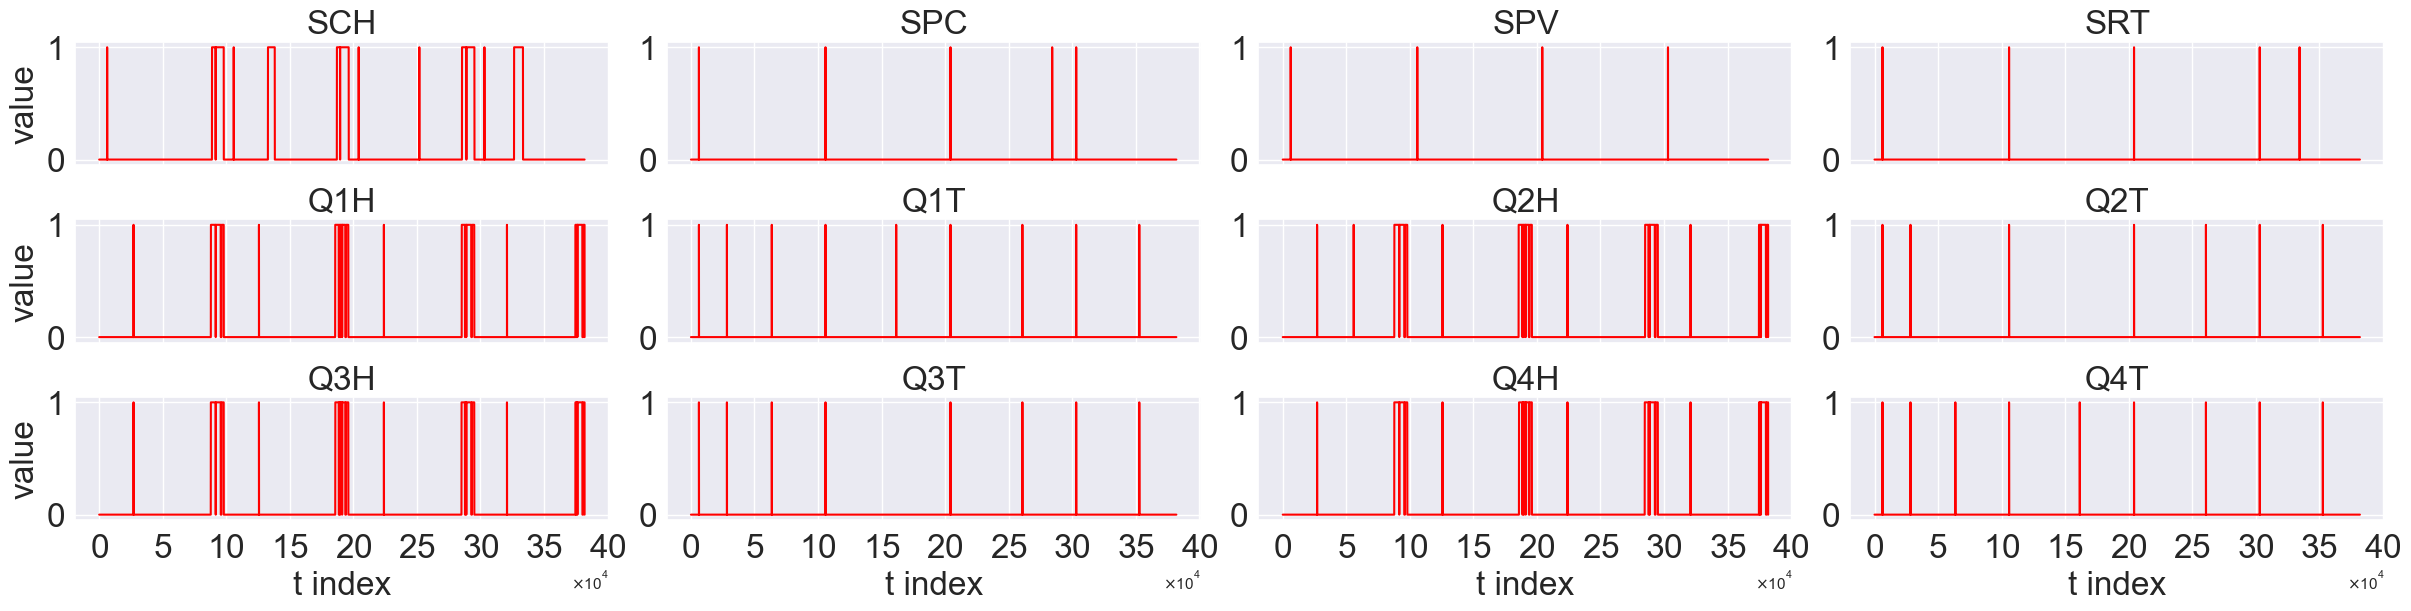

In [5]:
col = 4
fig, ax = util.plot_grid(df_aml_rca,
                         figsize=(6, 2), ncol=col, color="red",
                         x_gridno=10,
                         y_gridno=2,
                         wspace=0.1,
                         hspace=0.3,
                         fontsize=24,
                         legendfontsize=14,
                         labelfontsize=24,
                         tickfontsize=24,
                         x_label="t index", ylabel="value",
                         ncol_force=True, iscolor_per_col=False, use_timestamp=False, isshow=False, isreset_index=True
                         )
for i, ax_sub in enumerate(ax):
    _ = ax_sub.set_yticks([0, 1])
    _ = ax_sub.tick_params(axis='y', which='major', pad=1)
    _ = plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4), useMathText=True)
    if i >= df_aml_rca.shape[1]-col:
        _ = ax_sub.set_xlabel("t index")

util.save_figure(f"{datafilename}{DATASET}_{rbx_id}_od_flag", fig,
                 filepath=fig_dirpath, isshow=True, issave=True, dpi=100)

saving  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/CMS_HCAL_HEP07_cd_sparse_raw_compress_marked.jpg


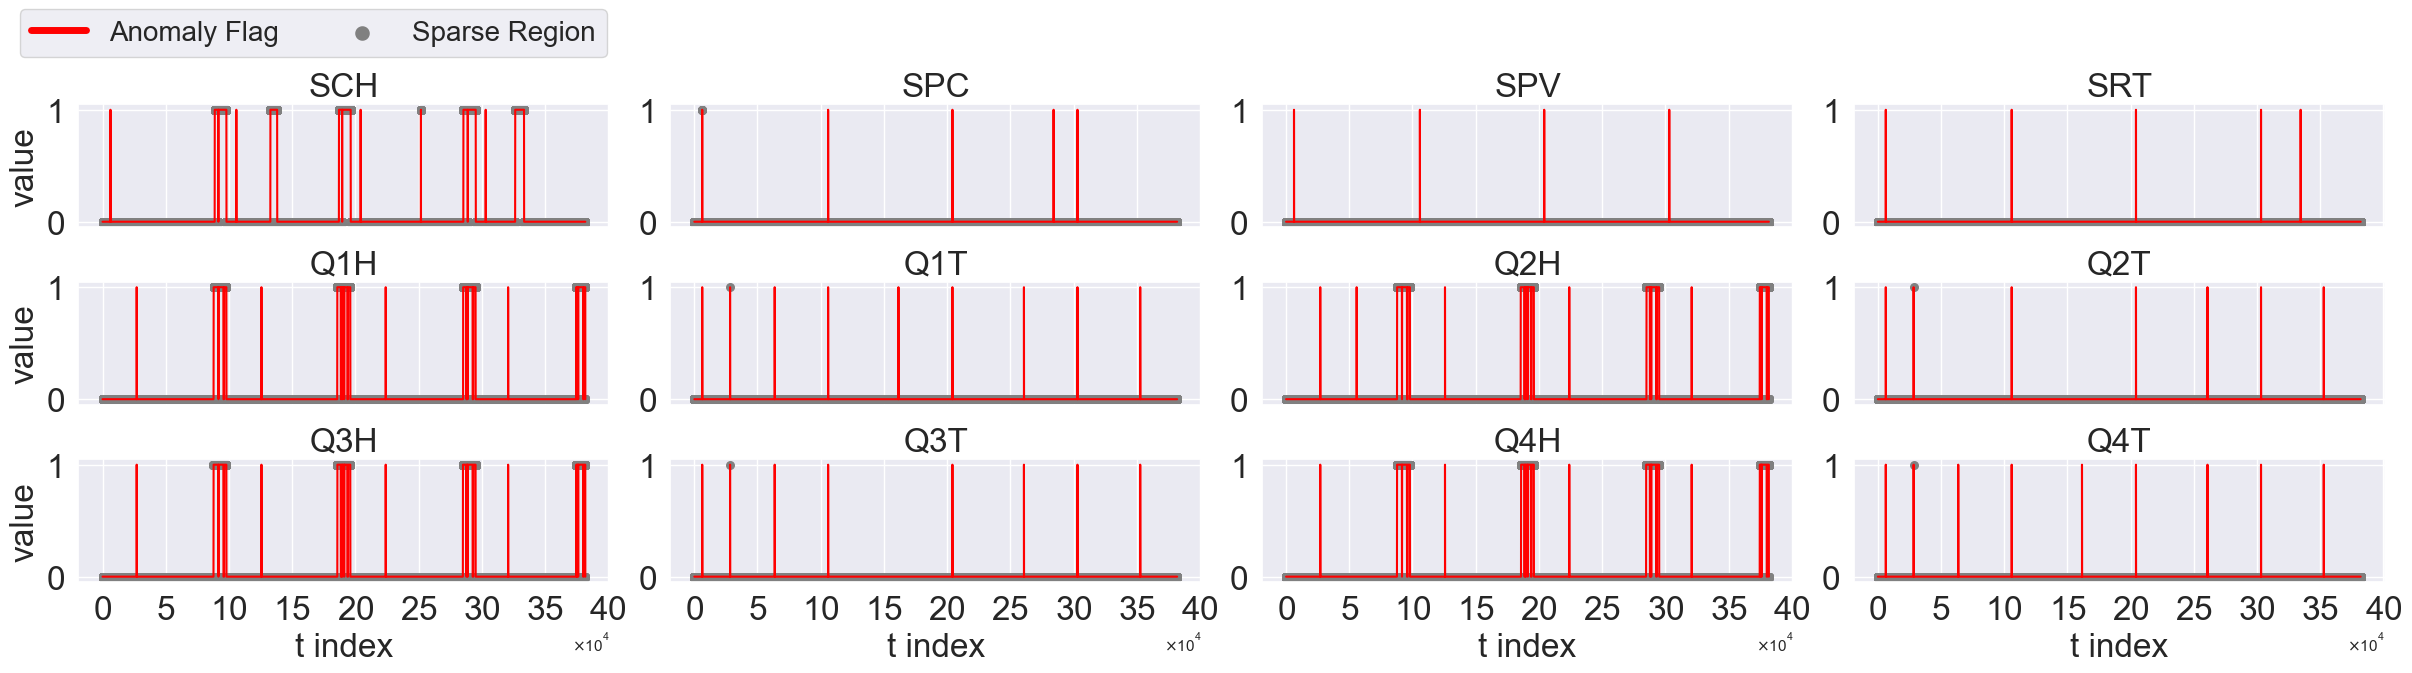

In [6]:
tau_max_ = 5
#  Binary time series plot config
ts_plot_kwargs = dict(figsize=(6, 2), ncol_force=True, ncol=4, x_gridno=10, 
                            color="red", xlabel="t index", ylabel="value",
                            isshow=False,
                            wspace=0.1,
                            hspace=0.3,
                            fontsize=24,
                            legendfontsize=20,
                            labelfontsize=24,
                            tickfontsize=24,
                            # bbox_to_anchor=(0.12, 0.99)
                            bbox_to_anchor=(0., 1.12)
                            )
fig = bays_util.sparse_data_highlighter(df_aml_rca.copy(), tau_max=2*tau_max_, **ts_plot_kwargs)
_ = plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4), useMathText=True)
util.save_figure(f"{datafilename}{DATASET}_{rbx_id}_cd_sparse_raw_compress_marked", fig,
                    filepath=fig_dirpath, isshow=True, issave=True, dpi=200)

sparse_data_handler...data_mode: flag:  {'keep_len': 10}
Input data size: (381944, 12), new size: (911, 12). The rate of compression by 99.76%
saving  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/CMS_HCAL_HEP07_od_sparse_compressed.jpg


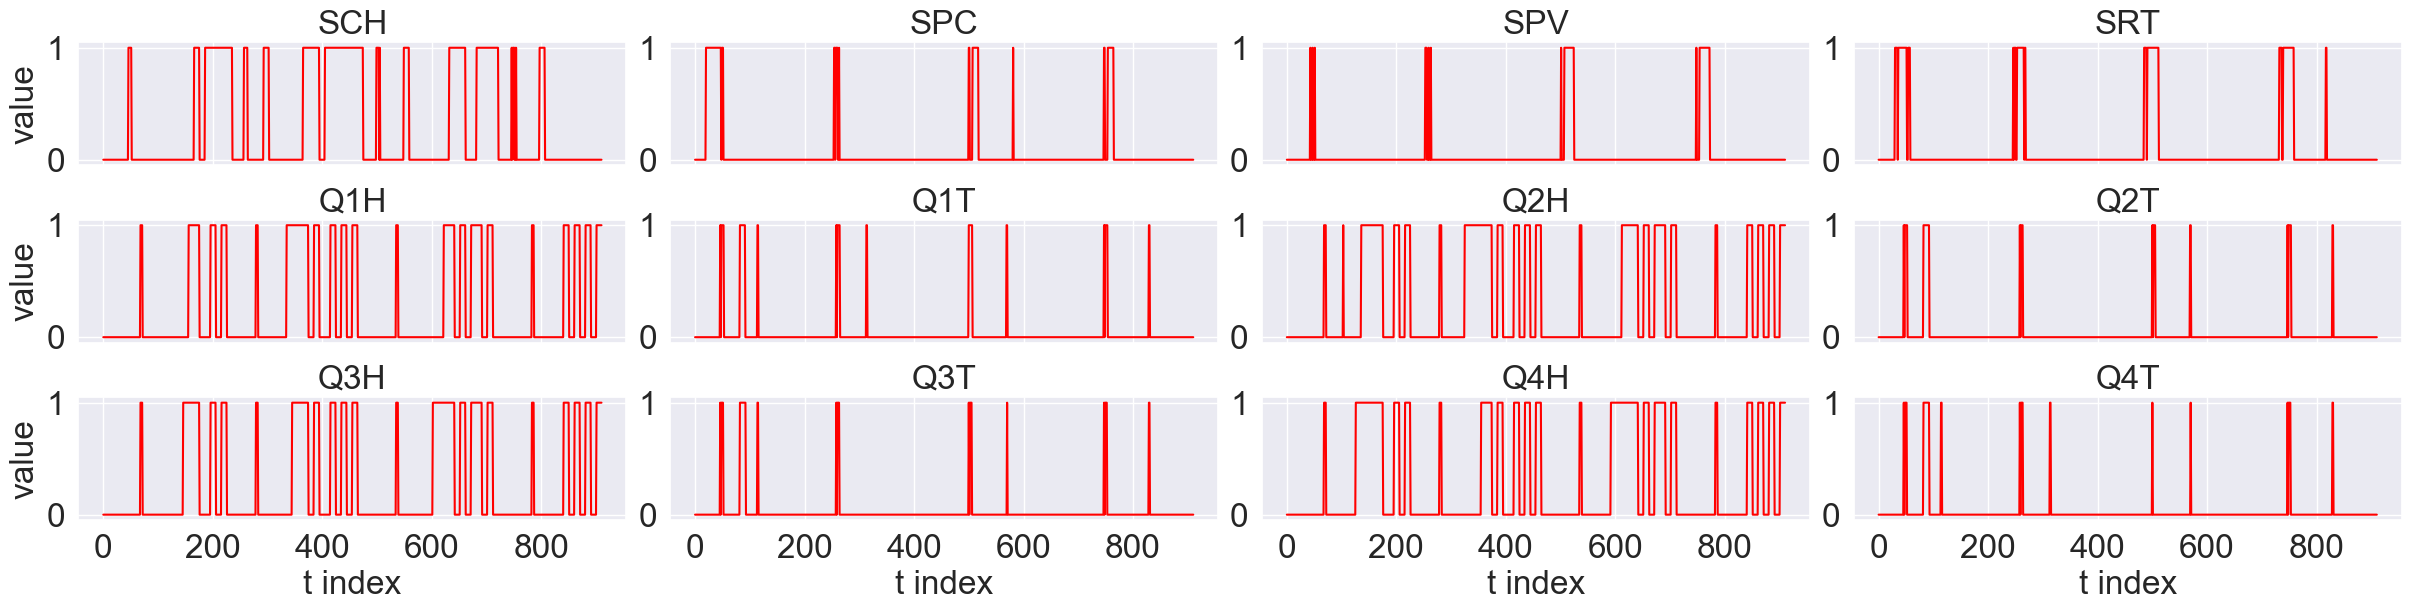

In [7]:
df_aml_compressed = bays_util.sparse_data_handler(
                                    df_aml_rca.copy().fillna(0), data_mode="flag", keep_len=2*tau_max_)  # prob changes with for non-ts due to keep_len
                             
fig, ax = util.plot_grid(df_aml_compressed, **{**ts_plot_kwargs, **dict(x_gridno=6)})
for ax_sub in ax:
    _ = ax_sub.set_yticks([0, 1])
util.save_figure(f"{datafilename}{DATASET}_{rbx_id}_od_sparse_compressed", fig,
                    filepath=fig_dirpath, isshow=True, issave=True, dpi=200)

# Correlation Analysis, with $\tau_{max}=5$ and Compression Data ${l_m=10}$

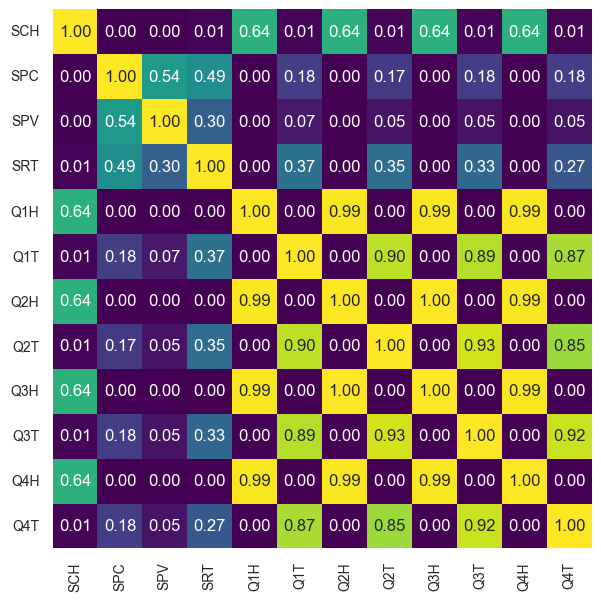

In [8]:
def get_corr_score(df):
    _corr_matrix = df.astype("float64").corr().astype("float64")
    _corr_matrix = _corr_matrix.applymap(lambda x: 0.0 if x < 0 else np.round(x, 2))
    # _corr_matrix
    varnames = df.columns
    vmin = 0.0
    vmax = 1.0
    fmt = "0.2f"
    iscbar = False
    fontsize = 10
    plt.figure(figsize=(7,7))
    with sns.axes_style("white"):
        ax = sns.heatmap(_corr_matrix.values, vmin=vmin, vmax=vmax, 
                            square=True,
                            annot=True, fmt=fmt, 
                            # cbar_kws=cbar_kws, 
                            cbar=iscbar, 
                            cmap='viridis',
                            ax=None
                        ) 
        _ = ax.set_xticklabels(varnames, rotation=90, fontsize=fontsize)
        _ = ax.set_yticklabels(varnames, rotation=0, fontsize=fontsize)

        plt.show()
    return _corr_matrix

_corr_matrix = get_corr_score(df_aml_rca)

# CD: Causal Graph Network Learning

In [9]:
from anomaly_cd import AnomalyCD
import networkx as nx
objAnmCD = AnomalyCD()

### Prepare Reference GCM

In [10]:
# based on https://ieeexplore.ieee.org/document/10620930

domain_pdag_edges = [
    ('SPV',
       'SPC'),
    ('SRT',
        'SPC'),
    ('SRT',
        'SPV'),

    ('Q1H',
        'Q2H'),
    ('Q1H',
        'Q3H'),
    ('Q1H',
        'Q4H'),

    ('Q2H',
        'Q1H'),
    ('Q2H',
        'Q3H'),
    ('Q2H',
        'Q4H'),

    ('Q3H',
        'Q1H'),
    ('Q3H',
        'Q2H'),
    ('Q3H',
        'Q4H'),

    ('Q4H',
        'Q1H'),
    ('Q4H',
        'Q2H'),
    ('Q4H',
        'Q3H'),

    ('Q1T',
        'Q2T'),
    ('Q1T',
        'Q3T'),
    ('Q1T',
        'Q4T'),

    ('Q2T',
        'Q1T'),
    ('Q2T',
        'Q3T'),
    ('Q2T',
        'Q4T'),

    ('Q3T',
        'Q1T'),
    ('Q3T',
        'Q2T'),
    ('Q3T',
        'Q4T'),

    ('Q4T',
        'Q1T'),
    ('Q4T',
        'Q2T'),
    ('Q4T',
        'Q3T'),

    # ('Q1T',
    #     'SPV'),
    # ('Q2T',
    #      'SPV'),
    #  ('Q3T',
    #      'SPV'),
    #  ('Q4T',
    #      'SPV'),
         
    # ('Q1T',
    #     'SPC'),
    # ('Q2T',
    #      'SPC'),
    #  ('Q3T',
    #      'SPC'),
    #  ('Q4T',
    #      'SPC'),

]

OutEdgeView([('SPV', 'SPC'), ('SRT', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2H', 'Q1H'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('Q2T', 'Q1T'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3H', 'Q4H'), ('Q3T', 'Q1T'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q2T'), ('Q4T', 'Q3T')])

['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


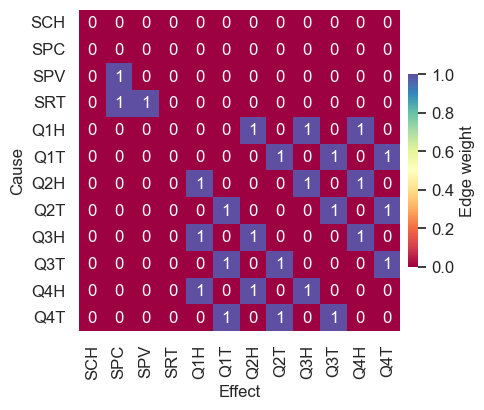

In [11]:
list_nodes = df_aml_rca.columns.tolist()
hcal_rm_PDAG_G = nx.DiGraph()
hcal_rm_PDAG_G.add_nodes_from(list_nodes)
hcal_rm_PDAG_G.add_edges_from(domain_pdag_edges)
hcal_rm_PDAG_G.edges()

bays_util.plot_adjacency_matrix(np.array(nx.adjacency_matrix(hcal_rm_PDAG_G).todense()),
                          hcal_rm_PDAG_G.nodes, vmin=0, vmax=1, t_lag=None, 
                          figsize=(5, 5), iscbar=True, fmt='0.0f', cbar_kws={
                              "label": "Edge weight",
                              "shrink": .5, "orientation": "vertical", "pad": 0.02}, isshow=True)

''

plot_dag_graph_ntk...
  source target weight  t
0    SPV    SPC      1  0
1    SRT    SPC      1  0
2    SRT    SPV      1  0
3    Q1H    Q2H      1  0
4    Q1H    Q3H      1  0
c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/cd_hcal_rm_groundtruth_graph_.html
Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q2T'), ('Q4T', 'Q3T')]


NodeView(('SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'))

[('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q2T'), ('Q4T', 'Q3T')] [('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q2T'), ('Q4T', 'Q3T')]


,APRC,SHD
0,1.0,0


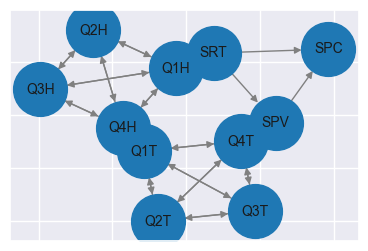

In [12]:
# PDAG, with bidirected GCM at t=0 for Q[1-4]T and Q[1-4]H, reference for GCM evaluation

kwargs = {}

ref_edge_df = pd.DataFrame(hcal_rm_PDAG_G.edges(), columns=["src", "dst"])
ref_edge_df["weight"] = 1
ref_edge_df["t"] = 0
ref_edge_df["pval"] = 0
ref_edge_df["src_lag"] = ref_edge_df["src"]

graph_html_filepath = rf"{fig_dirpath}/{datafilename}"
filetag = "_".join([str(v) for v in kwargs.values()])
filetag
graph_theme_sel = "white"
bays_util.plot_dag_graph_ntk(
                    ref_edge_df, ntk_structure_alg_tag=f"cd_hcal_rm_groundtruth_graph_{filetag}", filepath=graph_html_filepath,
                     physics=True, label_edges=False, isnotation=True, nodefontsize=30,
                    height="650px", isshow=True, issave=True, **bays_util.graph_theme[graph_theme_sel]
                    )

G = bays_util.prepare_digraph(ref_edge_df, df_aml_rca.columns.tolist())
G.nodes
# eval check for perfect match
bays_util.eval_graph_match(G, G)

### CD on Binary TS Data with $\tau_{max}=5$ and Compression Data ${l_m=10}$

##### PCMCI +- ANAC +- Edge Pruning

In [ ]:
#  Data samples are too large and very low processing 

# # AnomalyCD-Anomaly Transition Aware CI, no sparse handler, ispreprocess_sparse = False

# objAnmCD = AnomalyCD()

# maxlag = 5
# keep_len = 2*maxlag
# ispreprocess_sparse = False
# gc_algs = {
#             'ParCorr': dict(influence_dxn="both"), # non-ANAC
#             'ParCorr_ANAC': dict(influence_dxn="positive"), # ANAC
#             }
# pref_score_gcm_dict = {}
# for alg, alg_kwargs in gc_algs.items():
#     kwargs = dict(session="cms_hcal_rm",
#                     cd_sel="cd_ts",
#                     dag_skeleton_alg="pcmci",
#                     # influence_dxn="both",
#                     ci_test=alg.split("_")[0],
#                     significance_level=0.05,
#                     maxlag=maxlag,
#                     tau_min=0,
#                     keep_len=keep_len,
#                     ispreprocess_sparse=ispreprocess_sparse, # sparse data enable: nan values
#                     isflag_sparse_handle=True, # sparse flags if ispreprocess_sparse is True
#                     issparse_link=False, # default is True: self_lag + sparse links
#                     isremove_self_lags=True,  # self_lag
#                     session_tag="",
#                     )

#     df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
#                                                                         approach="fullts",
#                                                                         verbosity=0,
#                                                                         **kwargs, **alg_kwargs)
   
#     score_dict = bays_util.cd_eval_score_extended(G, edges_df, df_aml_rca.columns.tolist(), isplot=True)
#     score_dict["proc_t_sec"] = proc_t
#     pref_score_gcm_dict[alg] = score_dict

#     # Edge pruning
#     # prune_opt = {"isweight_first": True,
#     #          "weight_aware": True,
#     #          "use_weighted_tlag": True, "verbose": False}
#     # bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=True,
#     #                                             domain_edges=list(easycd_graph.edges()), **prune_opt)
#     # score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, isplot=True)
#     # pref_score_gcm_dict[f"{alg}_pruned_w_first"] = score_dict
#     prune_opt = {"isweight_first": False,
#                     "weight_aware": True,
#                     "use_weighted_tlag": True, "verbose": False}
#     tObj.restart()
#     bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=True,
#                                                   domain_edges=list(easycd_graph.edges()), **prune_opt)
#     score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, isplot=True)
#     score_dict["proc_t_sec"] = proc_t +  tObj.get_proctime()
#     pref_score_gcm_dict[f"{alg}_pruned_t_first"] = score_dict

In [23]:
# ispreprocess_sparse
# util.print_dict(pref_score_gcm_dict)
# pd.DataFrame.from_dict(pref_score_gcm_dict)

##### PCMCI +- ANAC +- Edge Pruning + Sparse Data Handler

110038

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

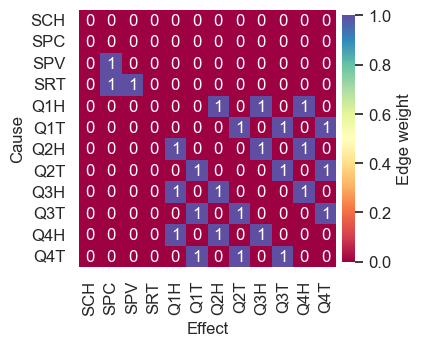

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


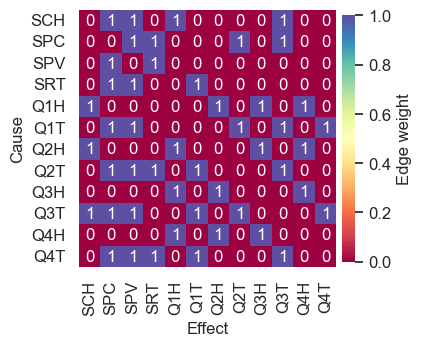

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q1H'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SRT'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2H', 'SCH'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'SPC'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'SPC'), ('Q4T', 'Q1T'), ('Q4T', 'SRT'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q1H'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), (

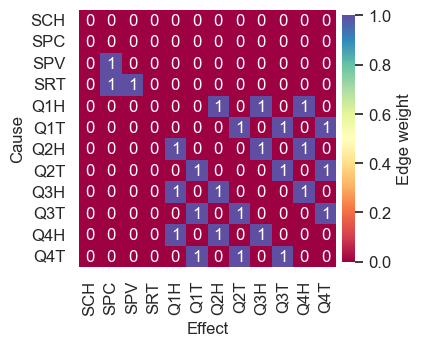

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


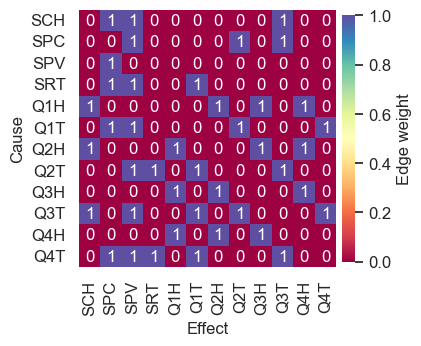

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2H', 'SCH'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'SPC'), ('Q4T', 'SRT'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), (

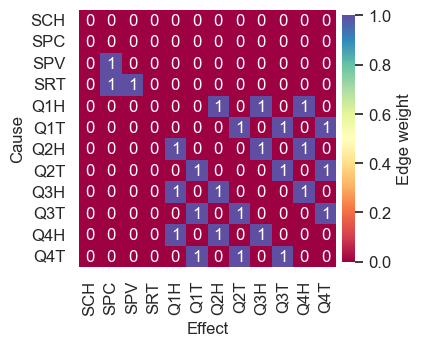

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


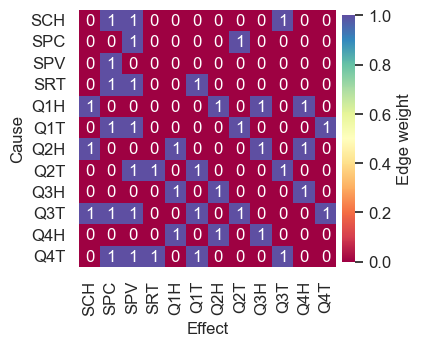

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2H', 'SCH'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'SPC'), ('Q4T', 'SRT'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), (

15288

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

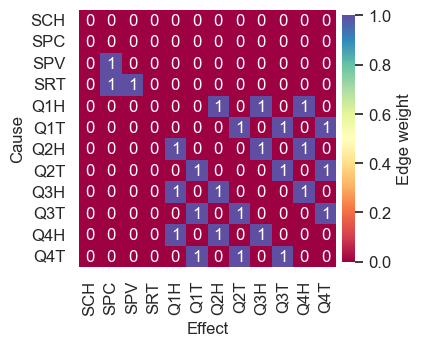

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


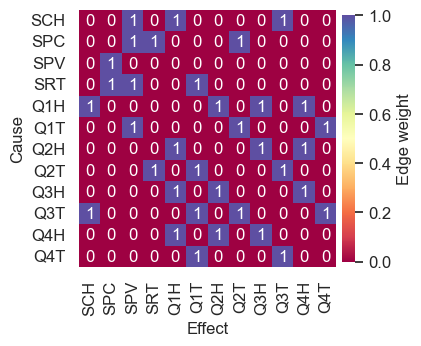

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q1H'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q1H'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), (

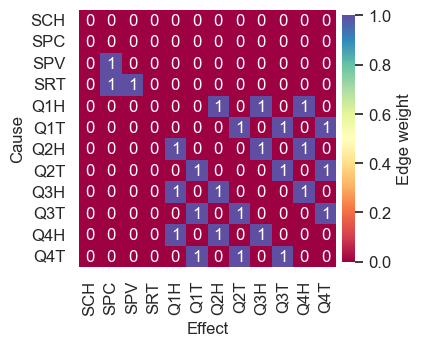

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


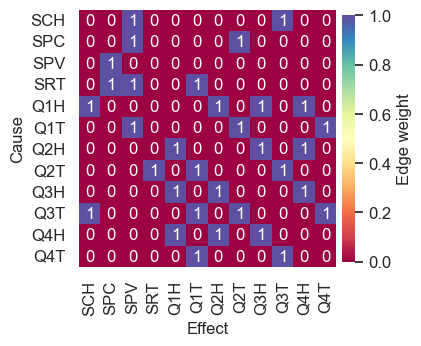

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), (

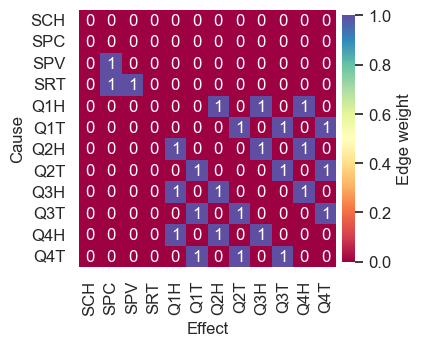

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


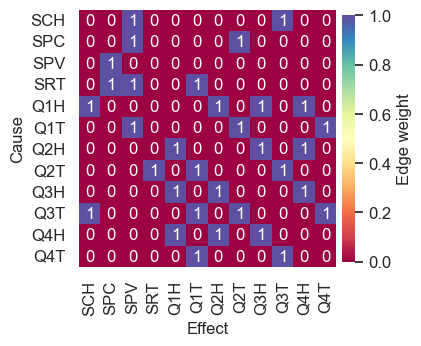

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('SRT', 'Q1T'), ('Q1H', 'Q4H'), ('Q1H', 'SCH'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q2T', 'SRT'), (

In [13]:
# AnomalyCD-Anomaly Transition Aware CI, with sparse handler, data: ispreprocess_sparse=True isflag_sparse_handle=True, and issparse_link=False
maxlag = 5
keep_len = 2*maxlag
ispreprocess_sparse = True
keep_undirected_at_lagged_zero = True
domain_edges_to_direct = None

gc_algs = {
            'ParCorr': dict(influence_dxn="both"), # non-ANAC
            'ParCorr_ANAC': dict(influence_dxn="positive"), # ANAC
        }

pref_score_gcm_dict = {}
for alg, alg_kwargs in gc_algs.items():
    gc.collect()
    kwargs = dict(session="cms_hcal_rm",
                  cd_sel="cd_ts",
                  dag_skeleton_alg="pcmci",
                  ci_test=alg.split("_")[0],
                  significance_level=0.05,
                  maxlag=maxlag,
                  tau_min=0,
                  keep_len=keep_len,
                  ispreprocess_sparse=ispreprocess_sparse,
                  isflag_sparse_handle=True,
                  issparse_link=False,
                  isremove_self_lags=True,
                  dag_params_alg=None, # exclude bn building
                  session_tag="",
                  )
    
    df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                        approach="fullts",
                                                                        verbosity=0,
                                                                        **kwargs, **alg_kwargs)
   
    score_dict = bays_util.cd_eval_score_extended(G, edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = edges_df.shape[0]
    score_dict["proc_t_sec"] = proc_t
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[alg] = score_dict

    # Edge pruning
    prune_opt = {"isweight_first": False,
                    "weight_aware": True,
                    "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                  domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()
    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = bn_edges_df.shape[0]
    score_dict["proc_t_sec"] = proc_t +  tObj.get_proctime()
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[f"{alg}_pruned_t_first"] = score_dict

    # Edge pruning
    prune_opt = {"isweight_first": True,
             "weight_aware": True,
             "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                  domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()
    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = bn_edges_df.shape[0]
    score_dict["proc_t_sec"] = proc_t +  tObj.get_proctime()
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[f"{alg}_pruned_w_first"] = score_dict

In [14]:
util.print_dict(kwargs)
util.print_dict(pref_score_gcm_dict)
pd.DataFrame.from_dict(pref_score_gcm_dict)


****************************************
session: cms_hcal_rm
cd_sel: cd_ts
dag_skeleton_alg: pcmci
ci_test: ParCorr
significance_level: 0.05
maxlag: 5
tau_min: 0
keep_len: 10
ispreprocess_sparse: True
isflag_sparse_handle: True
issparse_link: False
isremove_self_lags: True
dag_params_alg: None
session_tag: 
****************************************

****************************************
ParCorr: {'fpr': 0.41, 'precision': 0.521, 'recall': 0.926, 'F1': 0.667, 'shdu': 17, 'shd': 25, 'aprc': 0.73, 'num_edges': 91, 'proc_t_sec': 9.148108959197998, 'data_size': 911}
ParCorr_pruned_t_first: {'fpr': 0.41, 'precision': 0.571, 'recall': 0.889, 'F1': 0.696, 'shdu': 17, 'shd': 21, 'aprc': 0.741, 'num_edges': 42, 'proc_t_sec': 9.19023585319519, 'data_size': 911}
ParCorr_pruned_w_first: {'fpr': 0.41, 'precision': 0.571, 'recall': 0.889, 'F1': 0.696, 'shdu': 17, 'shd': 21, 'aprc': 0.741, 'num_edges': 42, 'proc_t_sec': 9.188743352890015, 'data_size': 911}
ParCorr_ANAC: {'fpr': 0.18, 'precision': 

,ParCorr,ParCorr_pruned_t_first,ParCorr_pruned_w_first,ParCorr_ANAC,ParCorr_ANAC_pruned_t_first,ParCorr_ANAC_pruned_w_first
fpr,0.410000,0.410000,0.410000,0.1800,0.180000,0.180000
precision,0.521000,0.571000,0.571000,0.6860,0.727000,0.727000
recall,0.926000,0.889000,0.889000,0.8890,0.889000,0.889000
F1,0.667000,0.696000,0.696000,0.7740,0.800000,0.800000
shdu,17.000000,17.000000,17.000000,8.0000,8.000000,8.000000
shd,25.000000,21.000000,21.000000,14.0000,12.000000,12.000000
aprc,0.730000,0.741000,0.741000,0.7980,0.818000,0.818000
num_edges,91.000000,42.000000,42.000000,42.0000,33.000000,33.000000
proc_t_sec,9.148109,9.190236,9.188743,8.9659,8.996805,9.007125
data_size,911.000000,911.000000,911.000000,911.0000,911.000000,911.000000


In [15]:
# add to comparison dfs
pref_score_compare_dfs = []
pref_score_compare_dfs.append(pd.DataFrame.from_dict(pref_score_gcm_dict).add_prefix("SPARSE_DATA_HANDLER__"))

##### PCMCI +- ANAC +- Edge Pruning + Sparse Data Handler + Sparse Link Handler

15270

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

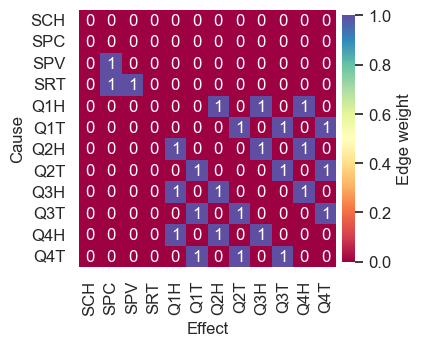

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


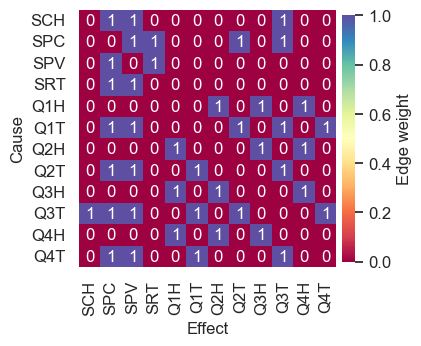

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SRT'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'SPC'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'SPC'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SRT'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), (

{'fpr': 0.282,
 'precision': 0.595,
 'recall': 0.926,
 'F1': 0.725,
 'shdu': 12,
 'shd': 19,
 'aprc': 0.768,
 'num_edges': 84}

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q3T  0 -0.072382
5   Q1T  Q4T  0  0.302953
6   Q1T  SPC -4 -0.077851
7   Q1T  SPV -5  0.093483
8   Q2H  Q1H  0  0.288203
9   Q2H  Q3H  0  0.265589
10  Q2H  Q4H  0  0.255115
11  Q2T  Q1T  0  0.408305
12  Q2T  Q3T  0  0.631012
13  Q2T  SPC -2 -0.083704
14  Q2T  SPV -4 -0.078915
15  Q3H  Q1H  0  0.375978
16  Q3H  Q2H  0  0.265589
17  Q3H  Q4H  0  0.377627
18  Q3T  Q1T -1  0.103840
19  Q3T  Q2T  0  0.631012
20  Q3T  Q4T  0  0.625850
21  Q3T  SCH  0  0.101248
22  Q3T  SPC -3 -0.089766
23  Q3T  SPV -4 -0.086948
24  Q4H  Q1H  0  0.338522
25  Q4H  Q2H  0  0.255115
26  Q4H  Q3H  0  0.377627
27  Q4T  Q1T  0  0.302953
28  Q4T  Q3T  0  0.625850
29  Q4T  SPC -3 -0.

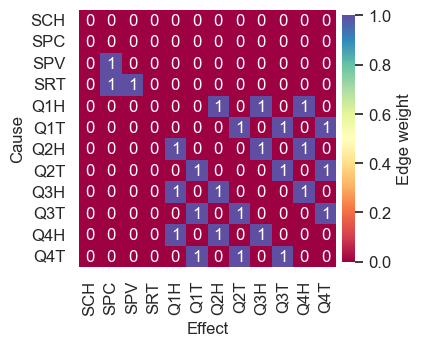

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


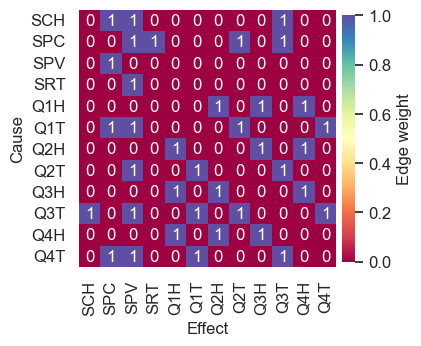

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'SPC'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'Q3T'), ('SPC', 'SPV'), ('SPC', 'SRT'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), (

{'fpr': 0.308,
 'precision': 0.622,
 'recall': 0.852,
 'F1': 0.719,
 'shdu': 13,
 'shd': 18,
 'aprc': 0.751,
 'num_edges': 37}

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q3T  0 -0.072382
5   Q1T  Q4T  0  0.302953
6   Q1T  SPC -4 -0.077851
7   Q1T  SPV -5  0.093483
8   Q2H  Q1H  0  0.288203
9   Q2H  Q3H  0  0.265589
10  Q2H  Q4H  0  0.255115
11  Q2T  Q1T  0  0.408305
12  Q2T  Q3T  0  0.631012
13  Q2T  SPC -2 -0.083704
14  Q2T  SPV -4 -0.078915
15  Q3H  Q1H  0  0.375978
16  Q3H  Q2H  0  0.265589
17  Q3H  Q4H  0  0.377627
18  Q3T  Q1T -1  0.103840
19  Q3T  Q2T  0  0.631012
20  Q3T  Q4T  0  0.625850
21  Q3T  SCH  0  0.101248
22  Q3T  SPC -3 -0.089766
23  Q3T  SPV -4 -0.086948
24  Q4H  Q1H  0  0.338522
25  Q4H  Q2H  0  0.255115
26  Q4H  Q3H  0  0.377627
27  Q4T  Q1T  0  0.302953
28  Q4T  Q3T  0  0.625850
29  Q4T  SPC -3 -0.

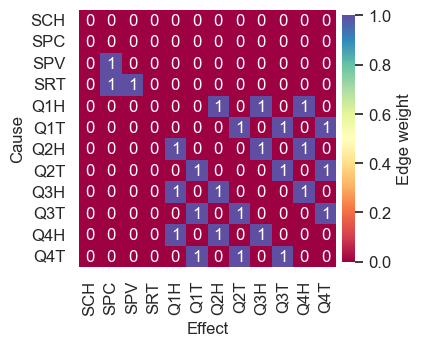

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


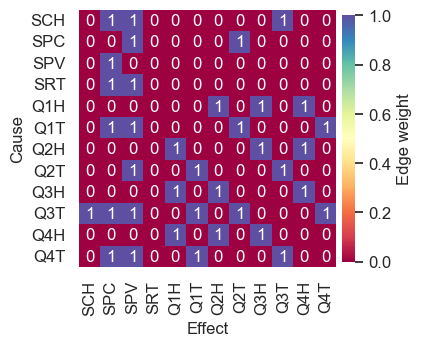

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'SPV'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'SPC'), ('Q4T', 'Q3T'), ('Q4T', 'SPV')]
predicted edges:  [('SCH', 'SPC'), ('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), (

91752

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

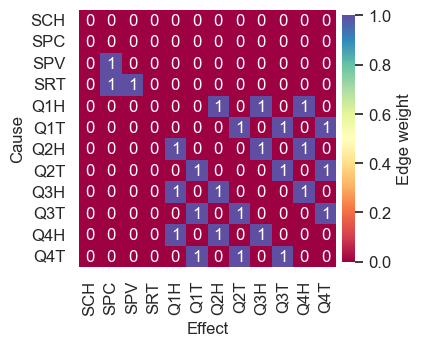

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


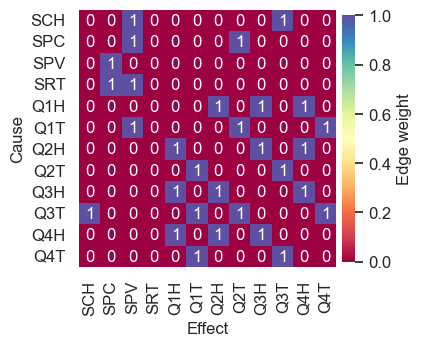

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), (

{'fpr': 0.103,
 'precision': 0.8,
 'recall': 0.889,
 'F1': 0.842,
 'shdu': 5,
 'shd': 9,
 'aprc': 0.855,
 'num_edges': 35}

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q4T  0  0.302953
5   Q1T  SPV -5  0.093483
6   Q2H  Q1H  0  0.288203
7   Q2H  Q3H  0  0.265589
8   Q2H  Q4H  0  0.255115
9   Q2T  Q1T  0  0.408305
10  Q2T  Q3T  0  0.631012
11  Q3H  Q1H  0  0.375978
12  Q3H  Q2H  0  0.265589
13  Q3H  Q4H  0  0.377627
14  Q3T  Q1T -1  0.103840
15  Q3T  Q2T  0  0.631012
16  Q3T  Q4T  0  0.625850
17  Q3T  SCH  0  0.101248
18  Q4H  Q1H  0  0.338522
19  Q4H  Q2H  0  0.255115
20  Q4H  Q3H  0  0.377627
21  Q4T  Q1T  0  0.302953
22  Q4T  Q3T  0  0.625850
23  SCH  Q3T  0  0.101248
24  SCH  SPV -5  0.072080
25  SPC  Q2T -3  0.122741
26  SPC  SPV  0  0.413023
27  SPV  SPC  0  0.413023
28  SRT  SPC -1  0.091725
29  SRT  SPV -5  0.

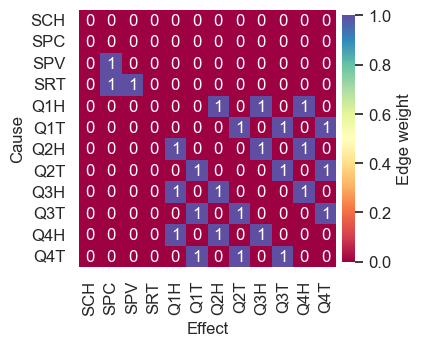

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


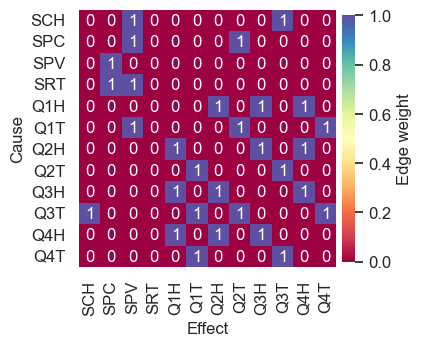

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), (

{'fpr': 0.103,
 'precision': 0.8,
 'recall': 0.889,
 'F1': 0.842,
 'shdu': 5,
 'shd': 9,
 'aprc': 0.855,
 'num_edges': 30}

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q4T  0  0.302953
5   Q1T  SPV -5  0.093483
6   Q2H  Q1H  0  0.288203
7   Q2H  Q3H  0  0.265589
8   Q2H  Q4H  0  0.255115
9   Q2T  Q1T  0  0.408305
10  Q2T  Q3T  0  0.631012
11  Q3H  Q1H  0  0.375978
12  Q3H  Q2H  0  0.265589
13  Q3H  Q4H  0  0.377627
14  Q3T  Q1T -1  0.103840
15  Q3T  Q2T  0  0.631012
16  Q3T  Q4T  0  0.625850
17  Q3T  SCH  0  0.101248
18  Q4H  Q1H  0  0.338522
19  Q4H  Q2H  0  0.255115
20  Q4H  Q3H  0  0.377627
21  Q4T  Q1T  0  0.302953
22  Q4T  Q3T  0  0.625850
23  SCH  Q3T  0  0.101248
24  SCH  SPV -5  0.072080
25  SPC  Q2T -3  0.122741
26  SPC  SPV  0  0.413023
27  SPV  SPC  0  0.413023
28  SRT  SPC -1  0.091725
29  SRT  SPV -5  0.

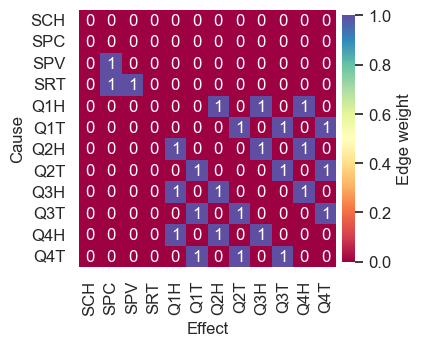

Estimated GCM
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


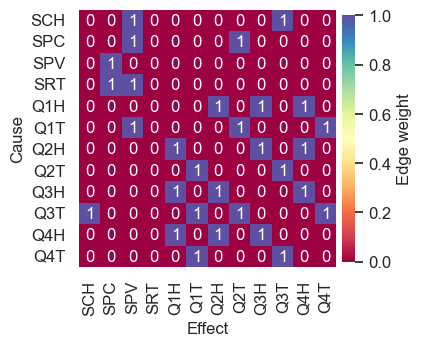

Graph nodes all: ['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Graph edges: [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), ('Q3T', 'Q1T'), ('Q4H', 'Q1H'), ('Q4H', 'Q2H'), ('Q4H', 'Q3H'), ('Q4T', 'Q1T'), ('Q4T', 'Q3T')]
predicted edges:  [('SCH', 'Q3T'), ('SCH', 'SPV'), ('SPC', 'SPV'), ('SPC', 'Q2T'), ('SPV', 'SPC'), ('SRT', 'SPV'), ('SRT', 'SPC'), ('Q1H', 'Q4H'), ('Q1H', 'Q3H'), ('Q1H', 'Q2H'), ('Q1T', 'Q2T'), ('Q1T', 'SPV'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q1H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q1T'), ('Q3H', 'Q4H'), ('Q3H', 'Q1H'), ('Q3H', 'Q2H'), ('Q3T', 'SCH'), ('Q3T', 'Q2T'), ('Q3T', 'Q4T'), (

In [16]:
# AnomalyCD-Anomaly Transition Aware CI, with sparse handler, data: ispreprocess_sparse=True isflag_sparse_handle=True, and issparse_link=True

maxlag = 5
keep_len = 2*maxlag
ispreprocess_sparse = True
keep_undirected_at_lagged_zero = True
domain_edges_to_direct = None
# link_assume_thr = 0.00
link_assume_thr = 0.01
gc_algs = {
            'ParCorr': dict(influence_dxn="both"), # non-ANAC
            'ParCorr_ANAC': dict(influence_dxn="positive") # ANAC
            }

pref_score_gcm_dict = {}
for alg, alg_kwargs in gc_algs.items():
    gc.collect()
    kwargs = dict(session="cms_hcal_rm",
                  cd_sel="cd_ts",
                  dag_skeleton_alg="pcmci",
                  ci_test=alg.split("_")[0],
                  significance_level=0.05,
                  maxlag=maxlag,
                  tau_min=0,
                  keep_len=keep_len,
                  ispreprocess_sparse=ispreprocess_sparse,
                  isflag_sparse_handle=True,
                  issparse_link=True,
                  isremove_self_lags=True,
                  link_assume_thr=link_assume_thr,
                  dag_params_alg=None, # exclude bn building
                  session_tag="",
                  )
    
    df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                        approach="fullts",
                                                                        verbosity=0,
                                                                        **kwargs, **alg_kwargs)
   
    score_dict = bays_util.cd_eval_score_extended(G, edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = edges_df.shape[0]
    score_dict
    score_dict["proc_t_sec"] = proc_t
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[alg] = score_dict

    # Edge pruning
    prune_opt = {"isweight_first": False,
                    "weight_aware": True,
                    "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                  domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()
    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = bn_edges_df.shape[0]
    score_dict
    score_dict["proc_t_sec"] = proc_t +  tObj.get_proctime()
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[f"{alg}_pruned_t_first"] = score_dict
    
    # Edge pruning
    prune_opt = {"isweight_first": True,
             "weight_aware": True,
             "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                  domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()
    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), return_summary=True, figsize=(4,4), isplot=True)
    score_dict["num_edges"] = bn_edges_df.shape[0]
    score_dict["proc_t_sec"] = proc_t +  tObj.get_proctime()
    score_dict["data_size"] = df_aml_rca_compressed.shape[0]
    pref_score_gcm_dict[f"{alg}_pruned_w_first"] = score_dict

In [17]:
util.print_dict(kwargs)
util.print_dict(pref_score_gcm_dict)
pd.DataFrame.from_dict(pref_score_gcm_dict)


****************************************
session: cms_hcal_rm
cd_sel: cd_ts
dag_skeleton_alg: pcmci
ci_test: ParCorr
significance_level: 0.05
maxlag: 5
tau_min: 0
keep_len: 10
ispreprocess_sparse: True
isflag_sparse_handle: True
issparse_link: True
isremove_self_lags: True
link_assume_thr: 0.01
dag_params_alg: None
session_tag: 
****************************************

****************************************
ParCorr: {'fpr': 0.282, 'precision': 0.595, 'recall': 0.926, 'F1': 0.725, 'shdu': 12, 'shd': 19, 'aprc': 0.768, 'num_edges': 84, 'proc_t_sec': 6.640592336654663, 'data_size': 911}
ParCorr_pruned_t_first: {'fpr': 0.308, 'precision': 0.622, 'recall': 0.852, 'F1': 0.719, 'shdu': 13, 'shd': 18, 'aprc': 0.751, 'num_edges': 37, 'proc_t_sec': 6.679708242416382, 'data_size': 911}
ParCorr_pruned_w_first: {'fpr': 0.282, 'precision': 0.649, 'recall': 0.889, 'F1': 0.75, 'shdu': 12, 'shd': 16, 'aprc': 0.779, 'num_edges': 37, 'proc_t_sec': 6.678498029708862, 'data_size': 911}
ParCorr_ANAC: {'

,ParCorr,ParCorr_pruned_t_first,ParCorr_pruned_w_first,ParCorr_ANAC,ParCorr_ANAC_pruned_t_first,ParCorr_ANAC_pruned_w_first
fpr,0.282000,0.308000,0.282000,0.103000,0.103000,0.103000
precision,0.595000,0.622000,0.649000,0.800000,0.800000,0.800000
recall,0.926000,0.852000,0.889000,0.889000,0.889000,0.889000
F1,0.725000,0.719000,0.750000,0.842000,0.842000,0.842000
shdu,12.000000,13.000000,12.000000,5.000000,5.000000,5.000000
shd,19.000000,18.000000,16.000000,9.000000,9.000000,9.000000
aprc,0.768000,0.751000,0.779000,0.855000,0.855000,0.855000
num_edges,84.000000,37.000000,37.000000,35.000000,30.000000,30.000000
proc_t_sec,6.640592,6.679708,6.678498,6.553003,6.587541,6.582536
data_size,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000


In [18]:
# add to comparison dfs
pref_score_compare_dfs.append(pd.DataFrame.from_dict(pref_score_gcm_dict).add_prefix("SPARSE_DATA_AND_LINK_HANDLER__"))

##### Compare all PCMCI results

In [19]:
#  data size is unrolled ts for bn
pref_score_compare_summary_df = pd.concat(pref_score_compare_dfs, axis=1).T.round(3)
# pref_score_compare_summary_df
sel_cols = ['precision', 'recall', 'F1', 'fpr', 'aprc', 'shd', 'shdu', 'num_edges', 'proc_t_sec']
pref_score_compare_summary_df = pref_score_compare_summary_df[sel_cols]
pref_score_compare_summary_df = pref_score_compare_summary_df.loc[pref_score_compare_summary_df.index.map(lambda x: "_pruned_w_first" not in x), sel_cols]
pref_score_compare_summary_df[['shdu', 'shd', 'num_edges']] = pref_score_compare_summary_df[['shdu', 'shd', 'num_edges']].astype("int16")
pref_score_compare_summary_df

,precision,recall,F1,fpr,aprc,shd,shdu,num_edges,proc_t_sec
SPARSE_DATA_HANDLER__ParCorr,0.521,0.926,0.667,0.410,0.730,25,17,91,9.148
SPARSE_DATA_HANDLER__ParCorr_pruned_t_first,0.571,0.889,0.696,0.410,0.741,21,17,42,9.190
SPARSE_DATA_HANDLER__ParCorr_ANAC,0.686,0.889,0.774,0.180,0.798,14,8,42,8.966
SPARSE_DATA_HANDLER__ParCorr_ANAC_pruned_t_first,0.727,0.889,0.800,0.180,0.818,12,8,33,8.997
SPARSE_DATA_AND_LINK_HANDLER__ParCorr,0.595,0.926,0.725,0.282,0.768,19,12,84,6.641
SPARSE_DATA_AND_LINK_HANDLER__ParCorr_pruned_t_first,0.622,0.852,0.719,0.308,0.751,18,13,37,6.680
SPARSE_DATA_AND_LINK_HANDLER__ParCorr_ANAC,0.800,0.889,0.842,0.103,0.855,9,5,35,6.553
SPARSE_DATA_AND_LINK_HANDLER__ParCorr_ANAC_pruned_t_first,0.800,0.889,0.842,0.103,0.855,9,5,30,6.588


In [20]:
# SDH: Sparse Data Handling
# SDLH: Sparse Data and Link Handling
pref_score_compare_summary_df.index = pref_score_compare_summary_df.index.map({'SPARSE_DATA_HANDLER__ParCorr': 'PCMCI + SDH',
                                                                                'SPARSE_DATA_HANDLER__ParCorr_pruned_t_first': 'PCMCI + SDH + T Pruning',
                                                                                'SPARSE_DATA_HANDLER__ParCorr_pruned_w_first': 'PCMCI + SDH + W Pruning',
                                                                                'SPARSE_DATA_HANDLER__ParCorr_ANAC': 'PCMCI + SDH + ANAC',
                                                                                'SPARSE_DATA_HANDLER__ParCorr_ANAC_pruned_t_first': 'PCMCI + SDH + ANAC + T Pruning',
                                                                                'SPARSE_DATA_HANDLER__ParCorr_ANAC_pruned_w_first': 'PCMCI + SDH + ANAC + W Pruning',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr': 'PCMCI + SDLH',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr_pruned_t_first': 'PCMCI + SDLH + T Pruning',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr_pruned_w_first': 'PCMCI + SDLH + W Pruning',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr_ANAC': 'PCMCI + SDLH + ANAC',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr_ANAC_pruned_t_first': 'PCMCI + SDLH + ANAC + T Pruning',
                                                                                'SPARSE_DATA_AND_LINK_HANDLER__ParCorr_ANAC_pruned_w_first': 'PCMCI + SDLH + ANAC + W Pruning'})
pref_score_compare_summary_df

,precision,recall,F1,fpr,aprc,shd,shdu,num_edges,proc_t_sec
PCMCI + SDH,0.521,0.926,0.667,0.410,0.730,25,17,91,9.148
PCMCI + SDH + T Pruning,0.571,0.889,0.696,0.410,0.741,21,17,42,9.190
PCMCI + SDH + ANAC,0.686,0.889,0.774,0.180,0.798,14,8,42,8.966
PCMCI + SDH + ANAC + T Pruning,0.727,0.889,0.800,0.180,0.818,12,8,33,8.997
PCMCI + SDLH,0.595,0.926,0.725,0.282,0.768,19,12,84,6.641
PCMCI + SDLH + T Pruning,0.622,0.852,0.719,0.308,0.751,18,13,37,6.680
PCMCI + SDLH + ANAC,0.800,0.889,0.842,0.103,0.855,9,5,35,6.553
PCMCI + SDLH + ANAC + T Pruning,0.800,0.889,0.842,0.103,0.855,9,5,30,6.588


In [21]:
pref_score_compare_summary_perc_df = (pref_score_compare_summary_df - pref_score_compare_summary_df.loc["PCMCI + SDH"]).divide(pref_score_compare_summary_df.loc["PCMCI + SDH"]).round(3)*100
# pref_score_compare_summary_perc_df.applymap(lambda x:f"{x:0.3}\\%" if x != 0 else "--")

pref_score_compare_summary_merge_df = pref_score_compare_summary_df.copy()
for col in pref_score_compare_summary_df.columns:
    # perc_arrows = pref_score_compare_summary_perc_df[col].map(lambda x:"$\\%\\uparrow$" if x > 0 else ("$\\%\\downarrow$"if x < 0 else ""))
    perc_arrows = pref_score_compare_summary_perc_df[col].map(lambda x:f"{x:0.1f}\\%" if x != 0 else "--")
    pref_score_compare_summary_merge_df[col] = pref_score_compare_summary_df[col].map(lambda x:f"{x:0.3f}") + " (" + perc_arrows + ")"

# pref_score_compare_summary_merge_df
sel_cols = ['F1', 'fpr', 'aprc', 'shdu', 'num_edges', 'proc_t_sec']
pref_score_compare_summary_merge_df.loc[pref_score_compare_summary_merge_df.index.map(lambda x: "W Pruning" not in x), sel_cols]

,F1,fpr,aprc,shdu,num_edges,proc_t_sec
PCMCI + SDH,0.667 (--),0.410 (--),0.730 (--),17.000 (--),91.000 (--),9.148 (--)
PCMCI + SDH + T Pruning,0.696 (4.3\%),0.410 (--),0.741 (1.5\%),17.000 (--),42.000 (-53.8\%),9.190 (0.5\%)
PCMCI + SDH + ANAC,0.774 (16.0\%),0.180 (-56.1\%),0.798 (9.3\%),8.000 (-52.9\%),42.000 (-53.8\%),8.966 (-2.0\%)
PCMCI + SDH + ANAC + T Pruning,0.800 (19.9\%),0.180 (-56.1\%),0.818 (12.1\%),8.000 (-52.9\%),33.000 (-63.7\%),8.997 (-1.7\%)
PCMCI + SDLH,0.725 (8.7\%),0.282 (-31.2\%),0.768 (5.2\%),12.000 (-29.4\%),84.000 (-7.7\%),6.641 (-27.4\%)
PCMCI + SDLH + T Pruning,0.719 (7.8\%),0.308 (-24.9\%),0.751 (2.9\%),13.000 (-23.5\%),37.000 (-59.3\%),6.680 (-27.0\%)
PCMCI + SDLH + ANAC,0.842 (26.2\%),0.103 (-74.9\%),0.855 (17.1\%),5.000 (-70.6\%),35.000 (-61.5\%),6.553 (-28.4\%)
PCMCI + SDLH + ANAC + T Pruning,0.842 (26.2\%),0.103 (-74.9\%),0.855 (17.1\%),5.000 (-70.6\%),30.000 (-67.0\%),6.588 (-28.0\%)


### CD with $\tau_{max}=5$ and Different Compression Lengths  ${l_m=\{10, 15, 20, 25, 30\}}$

In [22]:
ts_plot_kwargs = dict(figsize=(4, 2.3), ncol_force=True, ncol=4, 
                            # x_gridno=4, 
                            y_gridno=6,
                            force_y_gridno=True,
                            color="red", xlabel="$l_m$", ylabel="value",
                            isshow=False,
                            wspace=0.3,
                            hspace=0.3,
                            fontsize=16,
                            legendfontsize=15,
                            labelfontsize=16,
                            tickfontsize=16,
                            legend_idxs=[0],
                            bbox_to_anchor=(0.12, 0.99)
                        )
name_mapper = {'fpr':'FPR$\\downarrow$', 'precision':'P$\\uparrow$', 'recall':'R$\\uparrow$', 
                'F1':'F$_1\\uparrow$', 'shdu':'SHDU$\\downarrow$', 'shd':'SHD$\\downarrow$', 'aprc':'APRC$\\uparrow$', 
                'edge_prune':'EDGE_PRUNE',
                'data_size':'DATA SIZE$\\downarrow$', 'proc_t':'PROCESSING TIME (secs)$\\downarrow$',
                'maxlag':'MAXLAG', 'raw_size':'RAW DATA SIZE',
                'num_edges': "EDGE SIZE"
                }

#### PCMCI + ANAC +- Edge Pruning + Sparse Data Handling

In [ ]:
maxlag = 5
ispreprocess_sparse = True
issparse_link = False
link_assume_thr = 0.01
keep_undirected_at_lagged_zero = True # uses domain_edges at t==0
domain_edges_to_direct = None
score_dfs = []
results_keeplen_dict = {}
for keep_len in range(5, 51, 5):
    gc.collect()
    keep_len
    kwargs = dict(session="cms_hcal_rm",
                    cd_sel="cd_ts",
                    dag_skeleton_alg="pcmci",
                    ci_test='ParCorr',
                    influence_dxn="positive", # ANAC
                    significance_level=0.05,
                    maxlag=maxlag,
                    tau_min=0,
                    keep_len=keep_len,
                    ispreprocess_sparse=ispreprocess_sparse,
                    isflag_sparse_handle=True,
                    issparse_link=issparse_link,
                    isremove_self_lags=True,
                    link_assume_thr=link_assume_thr,
                    dag_params_alg = None, # exclude bn building
                    session_tag="",
                )

    df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                            approach="fullts",
                                                                            verbosity=0,
                                                                            **kwargs)

    perf_dict = {"maxlag": maxlag, 
                 "keep_len": keep_len,
                 "raw_size": df_aml_rca.shape[0], 
                 "data_size": df_aml_rca_compressed.shape[0], 
                 "proc_t": proc_t, 
                 }
    score_dict = bays_util.cd_eval_score_extended(G, edges_df, df_aml_rca.columns.tolist(), 
                                                return_summary=True, figsize=(6,6), 
                                                isplot=False
                                                )
    score_df = pd.DataFrame.from_dict({k:[v] for k, v in score_dict.items()})
    score_df["edge_prune"] = False
    score_df["maxlag"] = perf_dict["maxlag"]
    score_df["keep_len"] = perf_dict["keep_len"]
    score_df["raw_size"] = perf_dict["raw_size"]
    score_df["data_size"] = perf_dict["data_size"]
    score_df["num_edges"] = edges_df.shape[0]
    score_df["proc_t"] = perf_dict["proc_t"]
    score_df
    score_dfs.append(score_df)

    # Edge pruning
    prune_opt = {"isweight_first": False,
                    "weight_aware": True,
                    "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                    domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()

    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), 
                                                return_summary=True, figsize=(6,6), 
                                                isplot=False
                                                )
    score_df = pd.DataFrame.from_dict({k:[v] for k, v in score_dict.items()})
    score_df["edge_prune"] = True
    score_df["maxlag"] = perf_dict["maxlag"]
    score_df["keep_len"] = perf_dict["keep_len"]
    score_df["raw_size"] = perf_dict["raw_size"]
    score_df["data_size"] = perf_dict["data_size"]
    score_df["num_edges"] = bn_edges_df.shape[0]
    score_df["proc_t"] = perf_dict["proc_t"] + tObj.get_proctime()
    score_df
    score_dfs.append(score_df)

15270

5

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 5, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 5, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.154,0.727,0.889,0.8,7,12,0.818,False,5,5,381944,522,44,6.187298


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.389116
1   Q1H  Q3H  0  0.383653
2   Q1H  Q4H  0  0.278760
3   Q1H  SCH -5  0.243559
4   Q1T  Q2T  0  0.383474
5   Q1T  Q4T  0  0.327806
6   Q1T  SRT -5  0.093485
7   Q2H  Q1H  0  0.389116
8   Q2H  Q3H  0  0.256287
9   Q2H  Q4H  0  0.224194
10  Q2T  Q1T  0  0.383474
11  Q2T  Q3T  0  0.612121
12  Q2T  SRT -5  0.130746
13  Q3H  Q1H  0  0.383653
14  Q3H  Q2H  0  0.256287
15  Q3H  Q4H  0  0.380073
16  Q3T  Q1T -1  0.219954
17  Q3T  Q2T  0  0.612121
18  Q3T  Q4T  0  0.597421
19  Q3T  SPV -5  0.091385
20  Q4H  Q1H  0  0.278760
21  Q4H  Q2H  0  0.224194
22  Q4H  Q3H  0  0.380073
23  Q4H  SCH -4  0.130172
24  Q4T  Q1T  0  0.327806
25  Q4T  Q3T  0  0.597421
26  SCH  Q1H  0  0.109082
27  SPC  SPV  0  0.412466
28  SPC  SRT -1  0.110744
29  SPV  SPC  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.154,0.774,0.889,0.828,7,10,0.842,True,5,5,381944,522,31,6.218837


0

10

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.18,0.686,0.889,0.774,8,14,0.798,False,5,10,381944,911,42,8.161853


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.289317
1   Q1H  Q3H  0  0.375540
2   Q1H  Q4H  0  0.337254
3   Q1H  SCH -5  0.101048
4   Q1T  Q2T  0  0.402324
5   Q1T  Q4T  0  0.317182
6   Q1T  SPV -5  0.087585
7   Q2H  Q1H  0  0.289317
8   Q2H  Q3H  0  0.265961
9   Q2H  Q4H  0  0.255115
10  Q2T  Q1T  0  0.402324
11  Q2T  Q3T  0  0.631012
12  Q2T  SRT -5  0.085506
13  Q3H  Q1H  0  0.375540
14  Q3H  Q2H  0  0.265961
15  Q3H  Q4H  0  0.377627
16  Q3T  Q1T -1  0.105359
17  Q3T  Q2T  0  0.631012
18  Q3T  Q4T  0  0.625850
19  Q3T  SCH  0  0.102629
20  Q4H  Q1H  0  0.337254
21  Q4H  Q2H  0  0.255115
22  Q4H  Q3H  0  0.377627
23  Q4T  Q1T  0  0.317182
24  Q4T  Q3T  0  0.625850
25  SCH  Q1H  0  0.074803
26  SCH  Q3T  0  0.102629
27  SCH  SPV -5  0.073364
28  SPC  Q2T -3  0.122741
29  SPC  SPV  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.18,0.727,0.889,0.8,8,12,0.818,True,5,10,381944,911,33,8.193826


0

15

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 15, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 15, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.282,0.571,0.889,0.696,12,21,0.741,False,5,15,381944,1274,60,11.406896


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.280990
1   Q1H  Q3H  0  0.373553
2   Q1H  Q4H  0  0.186864
3   Q1H  SCH -5  0.127865
4   Q1T  Q2T  0  0.403429
5   Q1T  Q4T  0  0.315114
6   Q1T  SPV -5  0.100047
7   Q2H  Q1H  0  0.280990
8   Q2H  Q3H  0  0.266914
9   Q2H  Q4H  0  0.259826
10  Q2T  Q1T  0  0.403429
11  Q2T  Q3T  0  0.631063
12  Q2T  SPV -5  0.138400
13  Q2T  SRT -5  0.092363
14  Q3H  Q1H  0  0.373553
15  Q3H  Q2H  0  0.266914
16  Q3H  Q4H  0  0.376129
17  Q3T  Q1T -1  0.113921
18  Q3T  Q2T  0  0.631063
19  Q3T  Q4T  0  0.632303
20  Q3T  SCH  0  0.103264
21  Q3T  SPV -5  0.064460
22  Q4H  Q1H  0  0.186864
23  Q4H  Q2H  0  0.259826
24  Q4H  Q3H  0  0.376129
25  Q4T  Q1T  0  0.315114
26  Q4T  Q3T  0  0.632303
27  Q4T  SCH -1  0.062223
28  Q4T  SPV -1  0.069910
29  SCH  Q1H  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.308,0.622,0.852,0.719,13,18,0.751,True,5,15,381944,1274,37,11.444883


0

20

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 20, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 20, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.308,0.568,0.926,0.704,12,21,0.754,False,5,20,381944,1629,62,11.820934


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.278534
1   Q1H  Q3H  0  0.373534
2   Q1H  Q4H  0  0.368120
3   Q1H  SCH -5  0.148887
4   Q1T  Q2T  0  0.397639
5   Q1T  Q4T  0  0.314823
6   Q1T  SPV -5  0.065482
7   Q1T  SRT  0  0.050238
8   Q2H  Q1H  0  0.278534
9   Q2H  Q3H  0  0.267702
10  Q2H  Q4H  0  0.262179
11  Q2T  Q1T  0  0.397639
12  Q2T  Q3T  0  0.627201
13  Q2T  SPV -5  0.049649
14  Q2T  SRT -5  0.058853
15  Q3H  Q1H  0  0.373534
16  Q3H  Q2H  0  0.267702
17  Q3H  Q4H  0  0.375447
18  Q3T  Q1T -1  0.115273
19  Q3T  Q2T  0  0.627201
20  Q3T  Q4T  0  0.631077
21  Q3T  SCH  0  0.084408
22  Q3T  SPV -5  0.051832
23  Q4H  Q1H  0  0.368120
24  Q4H  Q2H  0  0.262179
25  Q4H  Q3H  0  0.375447
26  Q4T  Q1T  0  0.314823
27  Q4T  Q2T -2  0.061550
28  Q4T  Q3T  0  0.631077
29  Q4T  SCH -1  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.333,0.6,0.889,0.716,13,19,0.755,True,5,20,381944,1629,40,11.858978


0

25

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 25, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 25, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.256,0.581,0.926,0.714,10,20,0.761,False,5,25,381944,1974,64,14.40532


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.276783
1   Q1H  Q3H  0  0.372302
2   Q1H  Q4H  0  0.369380
3   Q1H  SCH -5  0.148286
4   Q1T  Q2T  0  0.398507
5   Q1T  Q4T  0  0.314740
6   Q1T  SPV -1  0.085375
7   Q1T  SRT -5  0.051433
8   Q2H  Q1H  0  0.276783
9   Q2H  Q3H  0  0.269119
10  Q2H  Q4H  0  0.262703
11  Q2T  Q1T  0  0.398507
12  Q2T  Q3T  0  0.627471
13  Q2T  SPV -1  0.064401
14  Q3H  Q1H  0  0.372302
15  Q3H  Q2H  0  0.269119
16  Q3H  Q4H  0  0.375299
17  Q3T  Q1T -1  0.114559
18  Q3T  Q2T  0  0.627471
19  Q3T  Q4T  0  0.630724
20  Q3T  SCH  0  0.107046
21  Q3T  SPV -1  0.045989
22  Q4H  Q1H  0  0.369380
23  Q4H  Q2H  0  0.262703
24  Q4H  Q3H  0  0.375299
25  Q4T  Q1T  0  0.314740
26  Q4T  Q2T -2  0.060326
27  Q4T  Q3T  0  0.630724
28  Q4T  SCH -5  0.066765
29  Q4T  SPV -1  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.256,0.676,0.926,0.781,10,14,0.808,True,5,25,381944,1974,37,14.448978


0

30

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 30, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 30, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.282,0.556,0.926,0.694,11,22,0.748,False,5,30,381944,2319,71,16.373555


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.275563
1   Q1H  Q3H  0  0.371787
2   Q1H  Q4H  0  0.062923
3   Q1H  SCH -5  0.140840
4   Q1T  Q2T  0  0.395584
5   Q1T  Q4T  0  0.318111
6   Q1T  SPV -1  0.083868
7   Q2H  Q1H  0  0.275563
8   Q2H  Q3H  0  0.269908
9   Q2H  Q4H  0  0.263131
10  Q2T  Q1T  0  0.395584
11  Q2T  Q3T  0  0.627510
12  Q2T  SPV -5  0.130657
13  Q3H  Q1H  0  0.371787
14  Q3H  Q2H  0  0.269908
15  Q3H  Q4H  0  0.375150
16  Q3T  Q1T -1  0.111273
17  Q3T  Q2T  0  0.627510
18  Q3T  Q4T  0  0.630750
19  Q3T  SCH  0  0.107442
20  Q3T  SPV -5  0.064815
21  Q4H  Q1H  0  0.062923
22  Q4H  Q2H  0  0.263131
23  Q4H  Q3H  0  0.375150
24  Q4T  Q1T  0  0.318111
25  Q4T  Q2T -2  0.059145
26  Q4T  Q3T  0  0.630750
27  Q4T  SCH -5  0.068891
28  Q4T  SPV -1  0.069194
29  SCH  Q1H  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.282,0.641,0.926,0.758,11,16,0.79,True,5,30,381944,2319,39,16.415559


0

35

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 35, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 35, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.359,0.51,0.926,0.658,14,26,0.725,False,5,35,381944,2662,76,24.66887


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.274695
1   Q1H  Q3H  0  0.371500
2   Q1H  Q4H  0  0.066566
3   Q1H  SCH  0  0.079112
4   Q1T  Q2T  0  0.359854
5   Q1T  Q4T  0  0.314485
6   Q1T  SPV -1  0.062219
7   Q1T  SRT -3  0.042829
8   Q2H  Q1H  0  0.274695
9   Q2H  Q3H  0  0.270406
10  Q2H  Q4H  0  0.263407
11  Q2T  Q1T  0  0.359854
12  Q2T  Q3T  0  0.630671
13  Q2T  SPV -5  0.134857
14  Q2T  SRT -5  0.043422
15  Q3H  Q1H  0  0.371500
16  Q3H  Q2H  0  0.270406
17  Q3H  Q4H  0  0.375036
18  Q3H  SCH  0  0.040977
19  Q3T  Q1T -1  0.104957
20  Q3T  Q2T  0  0.630671
21  Q3T  Q4T  0  0.631473
22  Q3T  SCH  0  0.107535
23  Q3T  SPV -5  0.063914
24  Q4H  Q1H  0  0.066566
25  Q4H  Q2H  0  0.263407
26  Q4H  Q3H  0  0.375036
27  Q4T  Q1T  0  0.314485
28  Q4T  Q2T -2  0.059095
29  Q4T  Q3T  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.385,0.546,0.889,0.676,15,23,0.728,True,5,35,381944,2662,44,24.713704


0

40

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 40, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 40, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.308,0.544,0.926,0.685,12,23,0.742,False,5,40,381944,3002,77,21.3986


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.274045
1   Q1H  Q3H  0  0.371333
2   Q1H  Q4H  0  0.051878
3   Q1H  SCH  0  0.075683
4   Q1T  Q2T  0  0.398608
5   Q1T  Q4T  0  0.314514
6   Q1T  SPV -5  0.110672
7   Q1T  SRT -3  0.054966
8   Q2H  Q1H  0  0.274045
9   Q2H  Q3H  0  0.270622
10  Q2H  Q4H  0  0.263778
11  Q2T  Q1T  0  0.398608
12  Q2T  Q3T  0  0.621467
13  Q2T  SPV -5  0.132685
14  Q2T  SRT -5  0.047898
15  Q3H  Q1H  0  0.371333
16  Q3H  Q2H  0  0.270622
17  Q3H  Q4H  0  0.374904
18  Q3H  SCH  0  0.045688
19  Q3T  Q1T -1  0.109439
20  Q3T  Q2T  0  0.621467
21  Q3T  Q4T  0  0.865825
22  Q3T  SCH  0  0.107691
23  Q3T  SPV -5  0.063897
24  Q4H  Q1H  0  0.051878
25  Q4H  Q2H  0  0.263778
26  Q4H  Q3H  0  0.374904
27  Q4T  Q1T  0  0.314514
28  Q4T  Q2T -3  0.049560
29  Q4T  Q3T  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.333,0.585,0.889,0.706,13,20,0.748,True,5,40,381944,3002,41,21.440103


0

45

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 45, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 45, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.282,0.544,0.926,0.685,11,23,0.742,False,5,45,381944,3341,78,22.687928


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.273548
1   Q1H  Q3H  0  0.371256
2   Q1H  Q4H  0  0.054031
3   Q1H  SCH  0  0.073210
4   Q1T  Q2T  0  0.398588
5   Q1T  Q4T  0  0.315058
6   Q1T  SPV -5  0.110677
7   Q1T  SRT -3  0.054974
8   Q2H  Q1H  0  0.273548
9   Q2H  Q3H  0  0.270747
10  Q2H  Q4H  0  0.264127
11  Q2T  Q1T  0  0.398588
12  Q2T  Q3T  0  0.621835
13  Q2T  SPV -5  0.154594
14  Q2T  SRT -5  0.050096
15  Q3H  Q1H  0  0.371256
16  Q3H  Q2H  0  0.270747
17  Q3H  Q4H  0  0.374803
18  Q3H  SCH  0  0.049035
19  Q3T  Q1T -1  0.109421
20  Q3T  Q2T  0  0.621835
21  Q3T  Q4T  0  0.861024
22  Q3T  SCH  0  0.107815
23  Q3T  SPC -4  0.040355
24  Q3T  SPV -5  0.063885
25  Q4H  Q1H  0  0.054031
26  Q4H  Q2H  0  0.264127
27  Q4H  Q3H  0  0.374803
28  Q4T  Q1T  0  0.315058
29  Q4T  Q2T -3  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.308,0.6,0.889,0.716,12,19,0.755,True,5,45,381944,3341,40,22.727083


0

50

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 50, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 50, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.333,0.521,0.926,0.667,13,25,0.73,False,5,50,381944,3676,76,32.020158


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.273174
1   Q1H  Q3H  0  0.371263
2   Q1H  Q4H  0  0.055370
3   Q1H  SCH  0  0.071101
4   Q1T  Q2T  0  0.356844
5   Q1T  Q4T  0  0.312013
6   Q1T  SPV -1  0.055821
7   Q1T  SRT -3  0.051697
8   Q2H  Q1H  0  0.273174
9   Q2H  Q3H  0  0.270721
10  Q2H  Q4H  0  0.264484
11  Q2T  Q1T  0  0.356844
12  Q2T  Q3T  0  0.621896
13  Q2T  SPV -5  0.154298
14  Q2T  SRT -5  0.049936
15  Q3H  Q1H  0  0.371263
16  Q3H  Q2H  0  0.270721
17  Q3H  Q4H  0  0.374782
18  Q3H  SCH  0  0.049680
19  Q3T  Q1T -1  0.110085
20  Q3T  Q2T  0  0.621896
21  Q3T  Q4T  0  0.858892
22  Q3T  SCH  0  0.109086
23  Q3T  SPC -4  0.044626
24  Q3T  SPV -5  0.046144
25  Q4H  Q1H  0  0.055370
26  Q4H  Q2H  0  0.264484
27  Q4H  Q3H  0  0.374782
28  Q4T  Q1T  0  0.312013
29  Q4T  Q2T -3  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.359,0.558,0.889,0.686,14,22,0.734,True,5,50,381944,3676,43,32.072605


In [24]:
score_compare_df = pd.concat(score_dfs, axis=0).reset_index(drop=True)
score_compare_df
score_compare_df[['shdu', 'shd', 'maxlag', 'keep_len', 'num_edges']] = score_compare_df[['shdu', 'shd', 'maxlag', 'keep_len', 'num_edges']].astype("int16")

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.154,0.727,0.889,0.800,7,12,0.818,False,5,5,381944,522,44,6.187298
1,0.154,0.774,0.889,0.828,7,10,0.842,True,5,5,381944,522,31,6.218837
2,0.180,0.686,0.889,0.774,8,14,0.798,False,5,10,381944,911,42,8.161853
3,0.180,0.727,0.889,0.800,8,12,0.818,True,5,10,381944,911,33,8.193826
4,0.282,0.571,0.889,0.696,12,21,0.741,False,5,15,381944,1274,60,11.406896
5,0.308,0.622,0.852,0.719,13,18,0.751,True,5,15,381944,1274,37,11.444883
6,0.308,0.568,0.926,0.704,12,21,0.754,False,5,20,381944,1629,62,11.820934
7,0.333,0.600,0.889,0.716,13,19,0.755,True,5,20,381944,1629,40,11.858978
8,0.256,0.581,0.926,0.714,10,20,0.761,False,5,25,381944,1974,64,14.405320
9,0.256,0.676,0.926,0.781,10,14,0.808,True,5,25,381944,1974,37,14.448978


In [25]:
ispreprocess_sparse , issparse_link 
score_compare_df.set_index("keep_len", inplace=True)
score_compare_df.columns
score_compare_df.columns = score_compare_df.columns.map(name_mapper)
score_compare_df

(True, False)

Index(['fpr', 'precision', 'recall', 'F1', 'shdu', 'shd', 'aprc', 'edge_prune', 'maxlag', 'raw_size', 'data_size', 'num_edges', 'proc_t'], dtype='object')

,FPR$\downarrow$,P$\uparrow$,R$\uparrow$,F$_1\uparrow$,SHDU$\downarrow$,SHD$\downarrow$,APRC$\uparrow$,EDGE_PRUNE,MAXLAG,RAW DATA SIZE,DATA SIZE$\downarrow$,EDGE SIZE,PROCESSING TIME (secs)$\downarrow$
keep_len,,,,,,,,,,,,,
5,0.154,0.727,0.889,0.800,7,12,0.818,False,5,381944,522,44,6.187298
5,0.154,0.774,0.889,0.828,7,10,0.842,True,5,381944,522,31,6.218837
10,0.180,0.686,0.889,0.774,8,14,0.798,False,5,381944,911,42,8.161853
10,0.180,0.727,0.889,0.800,8,12,0.818,True,5,381944,911,33,8.193826
15,0.282,0.571,0.889,0.696,12,21,0.741,False,5,381944,1274,60,11.406896
15,0.308,0.622,0.852,0.719,13,18,0.751,True,5,381944,1274,37,11.444883
20,0.308,0.568,0.926,0.704,12,21,0.754,False,5,381944,1629,62,11.820934
20,0.333,0.600,0.889,0.716,13,19,0.755,True,5,381944,1629,40,11.858978
25,0.256,0.581,0.926,0.714,10,20,0.761,False,5,381944,1974,64,14.405320


saving  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/CMS_HCAL_HEP07_cd_issparsedataTrue_issparselinkFalse_refGDomian_score_compare_df.jpg


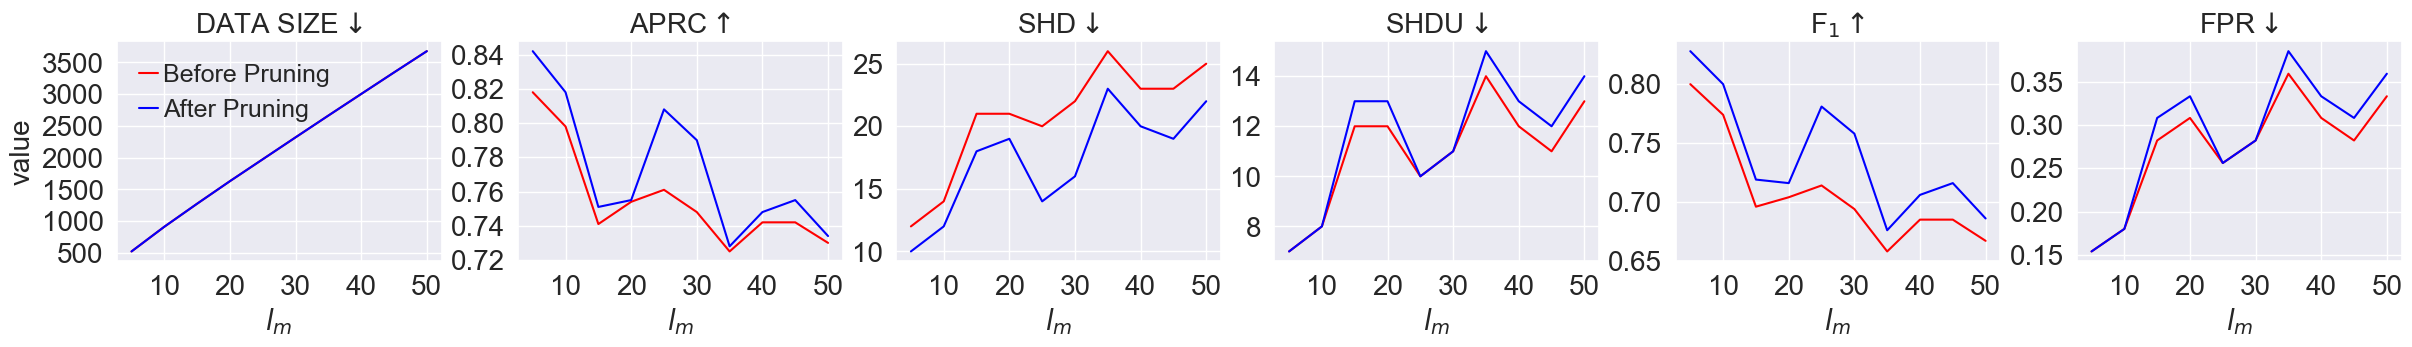

In [26]:
sel_cols = ["DATA SIZE$\\downarrow$", "APRC$\\uparrow$", "SHD$\\downarrow$", "SHDU$\\downarrow$", 'F$_1\\uparrow$', 'FPR$\\downarrow$']
fig, ax = util.plot_grid(score_compare_df.loc[score_compare_df["EDGE_PRUNE"]==0, sel_cols], join_df=score_compare_df.loc[score_compare_df["EDGE_PRUNE"]==1, sel_cols],
                          join_format="line", color_join="blue", 
                          use_timestamp=True,
                          legends=["Before Pruning", "After Pruning"],
                         **{**ts_plot_kwargs, **dict(figsize=(4, 3.3), ncol=6, y_gridno=7, fontsize=16+4,
                            labelfontsize=16+4,
                            tickfontsize=16+4)})

ax[0].legend(handlelength=0.75, handletextpad=0.2, fontsize=ts_plot_kwargs["legendfontsize"]+3)
    
util.save_figure(f"{datafilename}{DATASET}_{rbx_id}_cd_issparsedata{ispreprocess_sparse}_issparselink{issparse_link}_refGDomian_score_compare_df", fig,
                    filepath=fig_dirpath, 
                    isshow=True, 
                    issave=True, dpi=200)

#### PCMCI + ANAC +- Edge Pruning + Sparse Data Handling + Sparse Link Handling

In [ ]:
maxlag = 5
ispreprocess_sparse = True
issparse_link = True
link_assume_thr = 0.01
keep_undirected_at_lagged_zero = True # uses domain_edges at t==0
domain_edges_to_direct = None
score_dfs = []
results_keeplen_dict = {}

for keep_len in range(5, 51, 5):
    gc.collect()
    keep_len
    kwargs = dict(session="cms_hcal_rm",
                    cd_sel="cd_ts",
                    dag_skeleton_alg="pcmci",
                    ci_test='ParCorr',
                    influence_dxn="positive", # ANAC
                    significance_level=0.05,
                    maxlag=maxlag,
                    tau_min=0,
                    keep_len=keep_len,
                    ispreprocess_sparse=ispreprocess_sparse,
                    isflag_sparse_handle=True,
                    issparse_link=issparse_link,
                    isremove_self_lags=True,
                    link_assume_thr=link_assume_thr,
                    dag_params_alg=None, # exclude bn building
                    session_tag="",
                )

    df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                            approach="fullts",
                                                                            verbosity=0,
                                                                            **kwargs)
    perf_dict = {"maxlag": maxlag, 
                 "keep_len": keep_len,
                 "raw_size": df_aml_rca.shape[0], 
                 "data_size": df_aml_rca_compressed.shape[0], 
                 "proc_t": proc_t, 
                 }
    score_dict = bays_util.cd_eval_score_extended(G, edges_df, df_aml_rca.columns.tolist(), 
                                                return_summary=True, figsize=(6,6), 
                                                isplot=False
                                                )
    score_df = pd.DataFrame.from_dict({k:[v] for k, v in score_dict.items()})
    score_df["edge_prune"] = False
    score_df["maxlag"] = perf_dict["maxlag"]
    score_df["keep_len"] = perf_dict["keep_len"]
    score_df["raw_size"] = perf_dict["raw_size"]
    score_df["data_size"] = perf_dict["data_size"]
    score_df["num_edges"] = bn_edges_df.shape[0]
    score_df["proc_t"] = perf_dict["proc_t"]
    score_df
    score_dfs.append(score_df)

    # Edge pruning
    prune_opt = {"isweight_first": False,
                    "weight_aware": True,
                    "use_weighted_tlag": True, "verbose": False}
    tObj.restart()
    bn_edges_df = bays_util.prune_binary_ts_edges(edges_df, keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero,
                                                    domain_edges=domain_edges_to_direct, **prune_opt)
    tObj.stop()

    score_dict = bays_util.cd_eval_score_extended(G, bn_edges_df, df_aml_rca.columns.tolist(), 
                                                return_summary=True, figsize=(6,6), 
                                                isplot=False
                                                )
    score_df = pd.DataFrame.from_dict({k:[v] for k, v in score_dict.items()})
    score_df["edge_prune"] = True
    score_df["maxlag"] = perf_dict["maxlag"]
    score_df["keep_len"] = perf_dict["keep_len"]
    score_df["raw_size"] = perf_dict["raw_size"]
    score_df["data_size"] = perf_dict["data_size"]
    score_df["num_edges"] = bn_edges_df.shape[0]
    score_df["proc_t"] = perf_dict["proc_t"] + tObj.get_proctime()
    score_df
    score_dfs.append(score_df)

2674

5

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 5, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 5, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.051,0.857,0.889,0.873,3,7,0.883,False,5,5,381944,522,43,4.558196


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.378922
1   Q1H  Q3H  0  0.384175
2   Q1H  Q4H  0  0.187669
3   Q1T  Q2T  0  0.404059
4   Q1T  Q4T  0  0.314719
5   Q1T  SPV -5  0.133617
6   Q2H  Q1H  0  0.378922
7   Q2H  Q3H  0  0.241717
8   Q2H  Q4H  0  0.244012
9   Q2T  Q1T  0  0.404059
10  Q2T  Q3T  0  0.612121
11  Q3H  Q1H  0  0.384175
12  Q3H  Q2H  0  0.241717
13  Q3H  Q4H  0  0.384221
14  Q3T  Q1T -1  0.096722
15  Q3T  Q2T  0  0.612121
16  Q3T  Q4T  0  0.597421
17  Q3T  SPV -5  0.091385
18  Q4H  Q1H  0  0.187669
19  Q4H  Q2H  0  0.244012
20  Q4H  Q3H  0  0.384221
21  Q4T  Q1T  0  0.314719
22  Q4T  Q3T  0  0.597421
23  SPC  SPV  0  0.412466
24  SPC  SRT -1  0.113688
25  SPV  SPC  0  0.412466
26  SRT  SPC -5  0.156751
27  SRT  SPV -5  0.135487
    src  dst  t    weight       src_lag
0   Q

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.051,0.889,0.889,0.889,3,6,0.899,True,5,5,381944,522,27,4.587793


0

10

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.103,0.8,0.889,0.842,5,9,0.855,False,5,10,381944,911,27,7.738336


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q4T  0  0.302953
5   Q1T  SPV -5  0.093483
6   Q2H  Q1H  0  0.288203
7   Q2H  Q3H  0  0.265589
8   Q2H  Q4H  0  0.255115
9   Q2T  Q1T  0  0.408305
10  Q2T  Q3T  0  0.631012
11  Q3H  Q1H  0  0.375978
12  Q3H  Q2H  0  0.265589
13  Q3H  Q4H  0  0.377627
14  Q3T  Q1T -1  0.103840
15  Q3T  Q2T  0  0.631012
16  Q3T  Q4T  0  0.625850
17  Q3T  SCH  0  0.101248
18  Q4H  Q1H  0  0.338522
19  Q4H  Q2H  0  0.255115
20  Q4H  Q3H  0  0.377627
21  Q4T  Q1T  0  0.302953
22  Q4T  Q3T  0  0.625850
23  SCH  Q3T  0  0.101248
24  SCH  SPV -5  0.072080
25  SPC  Q2T -3  0.122741
26  SPC  SPV  0  0.413023
27  SPV  SPC  0  0.413023
28  SRT  SPC -1  0.091725
29  SRT  SPV -5  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.103,0.8,0.889,0.842,5,9,0.855,True,5,10,381944,911,30,7.776339


0

15

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 15, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 15, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.205,0.649,0.889,0.75,9,16,0.779,False,5,15,381944,1274,30,8.638209


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.281841
1   Q1H  Q3H  0  0.373928
2   Q1H  Q4H  0  0.365992
3   Q1T  Q2T  0  0.408434
4   Q1T  Q4T  0  0.301597
5   Q1T  SPV -5  0.122266
6   Q2H  Q1H  0  0.281841
7   Q2H  Q3H  0  0.266854
8   Q2H  Q4H  0  0.259860
9   Q2T  Q1T  0  0.408434
10  Q2T  Q3T  0  0.631367
11  Q2T  SPV -5  0.138400
12  Q3H  Q1H  0  0.373928
13  Q3H  Q2H  0  0.266854
14  Q3H  Q4H  0  0.376517
15  Q3T  Q1T -1  0.100880
16  Q3T  Q2T  0  0.631367
17  Q3T  Q4T  0  0.634639
18  Q3T  SCH  0  0.103756
19  Q3T  SPV -5  0.060477
20  Q4H  Q1H  0  0.365992
21  Q4H  Q2H  0  0.259860
22  Q4H  Q3H  0  0.376517
23  Q4T  Q1T  0  0.301597
24  Q4T  Q3T  0  0.634639
25  Q4T  SCH -1  0.062072
26  Q4T  SPV -1  0.069910
27  SCH  Q3T  0  0.103756
28  SCH  SPV -2  0.078655
29  SPC  Q2T -3  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.676,0.852,0.754,10,15,0.778,True,5,15,381944,1274,34,8.671448


0

20

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 20, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 20, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.205,0.676,0.926,0.781,8,14,0.808,False,5,20,381944,1629,34,9.961282


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.278534
1   Q1H  Q3H  0  0.373534
2   Q1H  Q4H  0  0.368088
3   Q1T  Q2T  0  0.407056
4   Q1T  Q4T  0  0.301492
5   Q1T  SPV -5  0.074689
6   Q2H  Q1H  0  0.278534
7   Q2H  Q3H  0  0.267702
8   Q2H  Q4H  0  0.262179
9   Q2T  Q1T  0  0.407056
10  Q2T  Q3T  0  0.628556
11  Q2T  SPV -5  0.053442
12  Q3H  Q1H  0  0.373534
13  Q3H  Q2H  0  0.267702
14  Q3H  Q4H  0  0.375455
15  Q3T  Q1T -1  0.104233
16  Q3T  Q2T  0  0.628556
17  Q3T  Q4T  0  0.631662
18  Q3T  SCH  0  0.106896
19  Q4H  Q1H  0  0.368088
20  Q4H  Q2H  0  0.262179
21  Q4H  Q3H  0  0.375455
22  Q4T  Q1T  0  0.301492
23  Q4T  Q2T -2  0.051346
24  Q4T  Q3T  0  0.631662
25  Q4T  SCH -1  0.064832
26  Q4T  SPV -1  0.052700
27  SCH  Q3T  0  0.106896
28  SCH  SPC  0  0.064457
29  SCH  SPV -2  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.667,0.889,0.762,9,15,0.788,True,5,20,381944,1629,36,9.993805


0

25

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 25, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 25, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.205,0.658,0.926,0.769,8,15,0.799,False,5,25,381944,1974,36,10.346303


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.276783
1   Q1H  Q3H  0  0.372555
2   Q1H  Q4H  0  0.238612
3   Q1T  Q2T  0  0.407055
4   Q1T  Q4T  0  0.301462
5   Q1T  SPV -1  0.085375
6   Q2H  Q1H  0  0.276783
7   Q2H  Q3H  0  0.269119
8   Q2H  Q4H  0  0.262681
9   Q2T  Q1T  0  0.407055
10  Q2T  Q3T  0  0.628595
11  Q2T  SPV -1  0.063807
12  Q3H  Q1H  0  0.372555
13  Q3H  Q2H  0  0.269119
14  Q3H  Q4H  0  0.375306
15  Q3T  Q1T -1  0.104607
16  Q3T  Q2T  0  0.628595
17  Q3T  Q4T  0  0.631682
18  Q3T  SCH  0  0.107272
19  Q3T  SPV -1  0.045860
20  Q4H  Q1H  0  0.238612
21  Q4H  Q2H  0  0.262681
22  Q4H  Q3H  0  0.375306
23  Q4T  Q1T  0  0.301462
24  Q4T  Q2T -2  0.051490
25  Q4T  Q3T  0  0.631682
26  Q4T  SCH -5  0.067236
27  Q4T  SPV -1  0.060599
28  SCH  Q3T  0  0.107272
29  SCH  SPV -2  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.686,0.889,0.774,9,14,0.798,True,5,25,381944,1974,35,10.382106


0

30

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 30, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 30, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.61,0.926,0.735,9,18,0.775,False,5,30,381944,2319,35,11.325373


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.275563
1   Q1H  Q3H  0  0.372025
2   Q1H  Q4H  0  0.240916
3   Q1T  Q2T  0  0.374858
4   Q1T  Q4T  0  0.299323
5   Q1T  SPV -1  0.070344
6   Q2H  Q1H  0  0.275563
7   Q2H  Q3H  0  0.269908
8   Q2H  Q4H  0  0.263114
9   Q2T  Q1T  0  0.374858
10  Q2T  Q3T  0  0.628621
11  Q2T  SPV -5  0.135959
12  Q3H  Q1H  0  0.372025
13  Q3H  Q2H  0  0.269908
14  Q3H  Q4H  0  0.375155
15  Q3T  Q1T -1  0.097077
16  Q3T  Q2T  0  0.628621
17  Q3T  Q4T  0  0.631696
18  Q3T  SCH  0  0.107532
19  Q3T  SPV -5  0.060746
20  Q4H  Q1H  0  0.240916
21  Q4H  Q2H  0  0.263114
22  Q4H  Q3H  0  0.375155
23  Q4T  Q1T  0  0.299323
24  Q4T  Q2T -2  0.049715
25  Q4T  Q3T  0  0.631696
26  Q4T  SCH -5  0.069215
27  Q4T  SPV -1  0.069194
28  SCH  Q3T  0  0.107532
29  SCH  SPC  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.256,0.649,0.889,0.75,10,16,0.779,True,5,30,381944,2319,37,11.364244


0

35

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 35, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 35, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.256,0.625,0.926,0.746,10,17,0.782,False,5,35,381944,2662,37,11.797852


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.274695
1   Q1H  Q3H  0  0.371725
2   Q1H  Q4H  0  0.062464
3   Q1T  Q2T  0  0.367765
4   Q1T  Q4T  0  0.298910
5   Q1T  SPV -1  0.064732
6   Q2H  Q1H  0  0.274695
7   Q2H  Q3H  0  0.270359
8   Q2H  Q4H  0  0.263517
9   Q2T  Q1T  0  0.367765
10  Q2T  Q3T  0  0.632165
11  Q2T  SPV -5  0.139870
12  Q3H  Q1H  0  0.371725
13  Q3H  Q2H  0  0.270359
14  Q3H  Q4H  0  0.375012
15  Q3T  Q1T -1  0.097034
16  Q3T  Q2T  0  0.632165
17  Q3T  Q4T  0  0.632476
18  Q3T  SCH  0  0.107721
19  Q3T  SPV -5  0.059300
20  Q4H  Q1H  0  0.062464
21  Q4H  Q2H  0  0.263517
22  Q4H  Q3H  0  0.375012
23  Q4T  Q1T  0  0.298910
24  Q4T  Q2T -2  0.049707
25  Q4T  Q3T  0  0.632476
26  Q4T  SCH -1  0.074369
27  Q4T  SPC -1  0.057210
28  Q4T  SPV -1  0.064706
29  SCH  Q3T  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.282,0.632,0.889,0.738,11,17,0.771,True,5,35,381944,2662,38,11.839858


0

40

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 40, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 40, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.205,0.641,0.926,0.758,8,16,0.79,False,5,40,381944,3002,38,15.804594


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.274045
1   Q1H  Q3H  0  0.371548
2   Q1H  Q4H  0  0.051878
3   Q1T  Q2T  0  0.368776
4   Q1T  Q4T  0  0.304683
5   Q1T  SPV -5  0.056901
6   Q2H  Q1H  0  0.274045
7   Q2H  Q3H  0  0.270622
8   Q2H  Q4H  0  0.263894
9   Q2T  Q1T  0  0.368776
10  Q2T  Q3T  0  0.622868
11  Q2T  SPV -5  0.137677
12  Q3H  Q1H  0  0.371548
13  Q3H  Q2H  0  0.270622
14  Q3H  Q4H  0  0.374875
15  Q3T  Q1T -1  0.102383
16  Q3T  Q2T  0  0.622868
17  Q3T  Q4T  0  0.644867
18  Q3T  SCH  0  0.107865
19  Q3T  SPV -5  0.059279
20  Q4H  Q1H  0  0.051878
21  Q4H  Q2H  0  0.263894
22  Q4H  Q3H  0  0.374875
23  Q4T  Q1T  0  0.304683
24  Q4T  Q2T -3  0.042957
25  Q4T  Q3T  0  0.644867
26  Q4T  SCH -5  0.075128
27  Q4T  SPC  0  0.037508
28  Q4T  SPV -1  0.064892
29  SCH  Q3T  0  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.667,0.889,0.762,9,15,0.788,True,5,40,381944,3002,36,15.840597


0

45

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 45, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 45, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.18,0.632,0.889,0.738,8,17,0.771,False,5,45,381944,3341,36,14.263768


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.273548
1   Q1H  Q3H  0  0.371460
2   Q1H  Q4H  0  0.054031
3   Q1T  Q2T  0  0.360595
4   Q1T  Q4T  0  0.305528
5   Q1T  SPV -5  0.056910
6   Q2H  Q1H  0  0.273548
7   Q2H  Q3H  0  0.270747
8   Q2H  Q4H  0  0.264235
9   Q2T  Q1T  0  0.360595
10  Q2T  Q3T  0  0.623204
11  Q2T  SPV -5  0.158371
12  Q3H  Q1H  0  0.371460
13  Q3H  Q2H  0  0.270747
14  Q3H  Q4H  0  0.374775
15  Q3T  Q1T -1  0.102383
16  Q3T  Q2T  0  0.623204
17  Q3T  Q4T  0  0.632874
18  Q3T  SCH  0  0.107979
19  Q3T  SPC -4  0.040355
20  Q3T  SPV -5  0.059262
21  Q4H  Q1H  0  0.054031
22  Q4H  Q2H  0  0.264235
23  Q4H  Q3H  0  0.374775
24  Q4T  Q1T  0  0.305528
25  Q4T  Q3T  0  0.632874
26  Q4T  SCH -5  0.072543
27  Q4T  SPV -1  0.070757
28  SCH  Q3T  0  0.107979
29  SPC  Q3T -3  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.205,0.697,0.852,0.767,9,14,0.788,True,5,45,381944,3341,33,14.297355


0

50

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 50, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 50, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.231,0.625,0.926,0.746,10,17,0.782,False,5,50,381944,3676,33,16.148347


################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: True, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.273174
1   Q1H  Q3H  0  0.371453
2   Q1H  Q4H  0  0.055370
3   Q1T  Q2T  0  0.360585
4   Q1T  Q3T -5  0.035215
5   Q1T  Q4T  0  0.305497
6   Q1T  SPV -5  0.056977
7   Q2H  Q1H  0  0.273174
8   Q2H  Q3H  0  0.270721
9   Q2H  Q4H  0  0.264584
10  Q2T  Q1T  0  0.360585
11  Q2T  Q3T  0  0.623249
12  Q2T  SPV -5  0.158324
13  Q3H  Q1H  0  0.371453
14  Q3H  Q2H  0  0.270721
15  Q3H  Q4H  0  0.374757
16  Q3T  Q1T -1  0.105654
17  Q3T  Q2T  0  0.623249
18  Q3T  Q4T  0  0.632738
19  Q3T  SCH  0  0.109282
20  Q3T  SPC -4  0.044626
21  Q3T  SPV -5  0.042841
22  Q4H  Q1H  0  0.055370
23  Q4H  Q2H  0  0.264584
24  Q4H  Q3H  0  0.374757
25  Q4T  Q1T  0  0.305497
26  Q4T  Q3T  0  0.632738
27  Q4T  SCH -5  0.073212
28  Q4T  SPC -1  0.062945
29  Q4T  SPV -1  0.

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.256,0.639,0.852,0.73,11,17,0.759,True,5,50,381944,3676,36,16.186407


In [28]:
score_compare_df = pd.concat(score_dfs, axis=0).reset_index(drop=True)
score_compare_df
score_compare_df[['shdu', 'shd', 'maxlag', 'keep_len', 'num_edges']] = score_compare_df[['shdu', 'shd', 'maxlag', 'keep_len', 'num_edges']].astype("int16")
# score_compare_df.dtypes

,fpr,precision,recall,F1,shdu,shd,aprc,edge_prune,maxlag,keep_len,raw_size,data_size,num_edges,proc_t
0,0.051,0.857,0.889,0.873,3,7,0.883,False,5,5,381944,522,43,4.558196
1,0.051,0.889,0.889,0.889,3,6,0.899,True,5,5,381944,522,27,4.587793
2,0.103,0.800,0.889,0.842,5,9,0.855,False,5,10,381944,911,27,7.738336
3,0.103,0.800,0.889,0.842,5,9,0.855,True,5,10,381944,911,30,7.776339
4,0.205,0.649,0.889,0.750,9,16,0.779,False,5,15,381944,1274,30,8.638209
5,0.231,0.676,0.852,0.754,10,15,0.778,True,5,15,381944,1274,34,8.671448
6,0.205,0.676,0.926,0.781,8,14,0.808,False,5,20,381944,1629,34,9.961282
7,0.231,0.667,0.889,0.762,9,15,0.788,True,5,20,381944,1629,36,9.993805
8,0.205,0.658,0.926,0.769,8,15,0.799,False,5,25,381944,1974,36,10.346303
9,0.231,0.686,0.889,0.774,9,14,0.798,True,5,25,381944,1974,35,10.382106


In [29]:
ispreprocess_sparse , issparse_link 
score_compare_df.set_index("keep_len", inplace=True)
score_compare_df.columns = score_compare_df.columns.map(name_mapper)
score_compare_df

(True, True)

,FPR$\downarrow$,P$\uparrow$,R$\uparrow$,F$_1\uparrow$,SHDU$\downarrow$,SHD$\downarrow$,APRC$\uparrow$,EDGE_PRUNE,MAXLAG,RAW DATA SIZE,DATA SIZE$\downarrow$,EDGE SIZE,PROCESSING TIME (secs)$\downarrow$
keep_len,,,,,,,,,,,,,
5,0.051,0.857,0.889,0.873,3,7,0.883,False,5,381944,522,43,4.558196
5,0.051,0.889,0.889,0.889,3,6,0.899,True,5,381944,522,27,4.587793
10,0.103,0.800,0.889,0.842,5,9,0.855,False,5,381944,911,27,7.738336
10,0.103,0.800,0.889,0.842,5,9,0.855,True,5,381944,911,30,7.776339
15,0.205,0.649,0.889,0.750,9,16,0.779,False,5,381944,1274,30,8.638209
15,0.231,0.676,0.852,0.754,10,15,0.778,True,5,381944,1274,34,8.671448
20,0.205,0.676,0.926,0.781,8,14,0.808,False,5,381944,1629,34,9.961282
20,0.231,0.667,0.889,0.762,9,15,0.788,True,5,381944,1629,36,9.993805
25,0.205,0.658,0.926,0.769,8,15,0.799,False,5,381944,1974,36,10.346303


saving  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/CMS_HCAL_HEP07_cd_issparsedataTrue_issparselinkTrue_refGDomian_score_compare_df.jpg


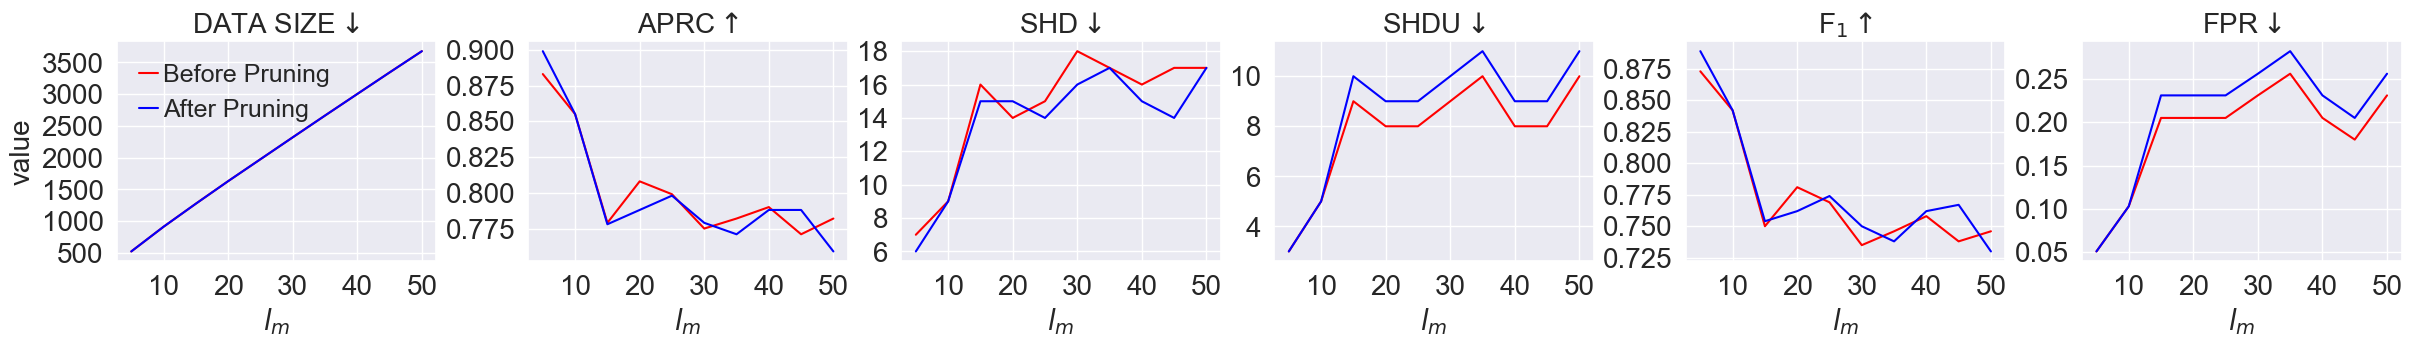

In [30]:
sel_cols = ["DATA SIZE$\\downarrow$", "APRC$\\uparrow$", "SHD$\\downarrow$", "SHDU$\\downarrow$", 'F$_1\\uparrow$', 'FPR$\\downarrow$']
fig, ax = util.plot_grid(score_compare_df.loc[score_compare_df["EDGE_PRUNE"]==0, sel_cols], join_df=score_compare_df.loc[score_compare_df["EDGE_PRUNE"]==1, sel_cols],
                          join_format="line", color_join="blue", 
                          use_timestamp=True,
                          legends=["Before Pruning", "After Pruning"],
                         **{**ts_plot_kwargs, **dict(figsize=(4, 3.3), ncol=6, y_gridno=7, fontsize=16+4,
                            labelfontsize=16+4,
                            tickfontsize=16+4)})
ax[0].legend(handlelength=0.75, handletextpad=0.2, fontsize=ts_plot_kwargs["legendfontsize"]+3)
util.save_figure(f"{datafilename}{DATASET}_{rbx_id}_cd_issparsedata{ispreprocess_sparse}_issparselink{issparse_link}_refGDomian_score_compare_df", fig,
                    filepath=fig_dirpath, 
                    isshow=True, 
                    issave=True, dpi=200)

# CD: BN Modeling and Causality Inference, with $\tau_{max}=5$ and Compression Data ${l_m=10}$

OutEdgeView([('SPV', 'SPC'), ('SRT', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q1T', 'SPV'), ('Q1T', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q2T', 'SPV'), ('Q2T', 'SPC'), ('Q3H', 'Q4H'), ('Q3T', 'Q4T'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q4T', 'SPV'), ('Q4T', 'SPC')])

['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']


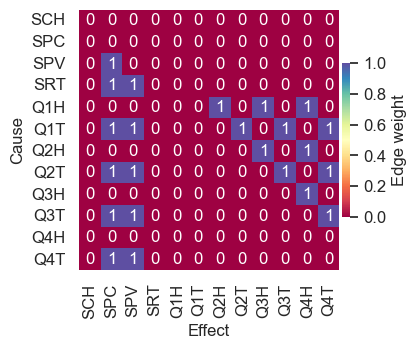

In [156]:
# All directed GCM, reference for BN modeling
domain_edges = [
                    ('SPV',
                    'SPC'),
                    ('SRT',
                        'SPC'),
                    ('SRT',
                    'SPV'),

                    ('Q1H',
                    'Q2H'),
                    ('Q1H',
                        'Q3H'),
                    ('Q1H',
                        'Q4H'),

                    ('Q2H',
                        'Q3H'),
                    ('Q2H',
                        'Q4H'),
                    ('Q3H',
                        'Q4H'),

                    ('Q1T',
                        'Q2T'),
                    ('Q1T',
                        'Q3T'),
                    ('Q1T',
                        'Q4T'),

                    ('Q2T',
                        'Q3T'),
                    ('Q2T',
                    'Q4T'),
                    ('Q3T',
                        'Q4T'),
                    ('Q1T',
                        'SPV'),
                    ('Q1T',
                    'SPC'),

                    ('Q2T',
                        'SPV'),
                    ('Q2T',
                    'SPC'),

                    ('Q3T',
                    'SPV'),
                    ('Q3T',
                        'SPC'),

                    ('Q4T',
                    'SPV'),
                    ('Q4T',
                        'SPC'),
]

list_nodes = df_aml_rca.columns.tolist()
hcal_rm_Directed_G = nx.DiGraph()
hcal_rm_Directed_G.add_nodes_from(list_nodes)
hcal_rm_Directed_G.add_edges_from(domain_edges)
hcal_rm_Directed_G.edges()

directed_domain_Amatrix = np.array(nx.adjacency_matrix(hcal_rm_Directed_G).todense())
_ = bays_util.plot_adjacency_matrix(directed_domain_Amatrix,
                                    hcal_rm_Directed_G.nodes, vmin=0, vmax=1, t_lag=None, figsize=(4,4), iscbar=True, fmt='.0f', cbar_kws={
                                    "label": "Edge weight",
                                    "shrink": .5, "orientation": "vertical", "pad": 0.01}, isshow=True
                                    )

In [157]:
cd_opts_dict = {
    "cd_cond_prob_infer_report": "Probabilistic Inference Report",
    "cd_all_causal_nodes": "All Causal Nodes",
    "cd_connected": "Connected (Reachable) Nodes",
    "cd_d_connected": "Check Causal Connection",
    "cd_plt_causal": "Plot Causal Network",
    "cd_plt_effect": "Plot Influenced Network"
}
util.print_dict(cd_opts_dict)


****************************************
cd_cond_prob_infer_report: Probabilistic Inference Report
cd_all_causal_nodes: All Causal Nodes
cd_connected: Connected (Reachable) Nodes
cd_d_connected: Check Causal Connection
cd_plt_causal: Plot Causal Network
cd_plt_effect: Plot Influenced Network
****************************************


#### PCMCI + ANAC + Edge Pruning + Sparse Data Handler

In [158]:
maxlag = 5
keep_len = 2*maxlag
ispreprocess_sparse = True
issparse_link = False
link_assume_thr = 0.01
kwargs = dict(session="cms_hcal_rm",
                  cd_sel="cd_ts",
                  dag_skeleton_alg="pcmci",
                  ci_test='ParCorr',
                  influence_dxn="positive",
                  significance_level=0.05,
                  maxlag=maxlag,
                  tau_min=0,
                  keep_len=keep_len,
                  ispreprocess_sparse=ispreprocess_sparse,
                  isflag_sparse_handle=True,
                  isremove_self_lags=True,
                  issparse_link=issparse_link,
                  link_assume_thr=link_assume_thr,
                  session_tag="",
            )

df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                                approach="fullts",
                                                                                verbosity=0,
                                                                                **kwargs
                                                                                )

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

'cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_False_0.01_'

plot_dag_graph_ntk...
  source target    weight        t
0    Q1H    Q2H  0.289317      [0]
1    Q1H    Q3H   0.37554      [0]
2    Q1H    Q4H  0.337254      [0]
3    Q1H    SCH  0.175852  [0, -5]
4    Q1T    Q2T  0.402324      [0]
c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/rcats_graph_cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_False_0.01_.html


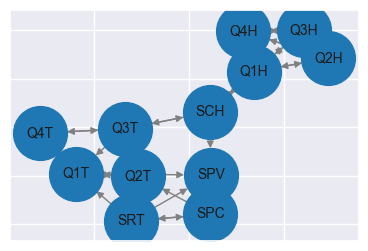

In [159]:
graph_html_filepath = rf"{fig_dirpath}/{datafilename}"
filetag = "_".join([str(v) for v in kwargs.values()])
filetag
graph_theme_sel = "white"
bays_util.plot_dag_graph_ntk(
                            bays_util.aggregate_time_tag_edges(edges_df)[['src', 'dst', 'weight', 't']], 
                            ntk_structure_alg_tag=f"rcats_graph_{filetag}", 
                            filepath=graph_html_filepath,
                            physics=True, label_edges=True, isnotation=True, nodefontsize=30,
                            height="650px", isshow=True, issave=True, **bays_util.graph_theme[graph_theme_sel],
                            )

##### Using Domain Edges for Orienting Bidirected Links at $t=0$

In [160]:
prune_opt = {"isweight_first":False,
            "weight_aware":True,
            "use_weighted_tlag":True, 
            "verbose": False
            }
keep_undirected_at_lagged_zero = False # uses domain_edges at t==0
domain_edges_to_direct = domain_edges
dag_param_model, dag_bn_skeleton_model, bn_edges_df = objAnmCD.cd_bn_model_build(df_aml_rca_compressed.fillna(0), 
                                                                                edges_df, 
                                                                                dag_params_alg='bayesian', 
                                                                                keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero, 
                                                                                equivalent_sample_size=10,
                                                                                domain_edges=domain_edges_to_direct, **prune_opt)

cd_bn_analysis... {'keep_undirected_at_lagged_zero': False, 'equivalent_sample_size': 10, 'domain_edges': [('SPV', 'SPC'), ('SRT', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('Q3H', 'Q4H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q3T', 'Q4T'), ('Q1T', 'SPV'), ('Q1T', 'SPC'), ('Q2T', 'SPV'), ('Q2T', 'SPC'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q4T', 'SPV'), ('Q4T', 'SPC')], 'isweight_first': False, 'weight_aware': True, 'use_weighted_tlag': True, 'verbose': False}


10it [00:00, 1428.33it/s]

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: False, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.289317
1   Q1H  Q3H  0  0.375540
2   Q1H  Q4H  0  0.337254
3   Q1H  SCH -5  0.101048
4   Q1T  Q2T  0  0.402324
5   Q1T  Q4T  0  0.317182
6   Q1T  SPV -5  0.087585
7   Q2H  Q1H  0  0.289317
8   Q2H  Q3H  0  0.265961
9   Q2H  Q4H  0  0.255115
10  Q2T  Q1T  0  0.402324
11  Q2T  Q3T  0  0.631012
12  Q2T  SRT -5  0.085506
13  Q3H  Q1H  0  0.375540
14  Q3H  Q2H  0  0.265961
15  Q3H  Q4H  0  0.377627
16  Q3T  Q1T -1  0.105359
17  Q3T  Q2T  0  0.631012
18  Q3T  Q4T  0  0.625850
19  Q3T  SCH  0  0.102629
20  Q4H  Q1H  0  0.337254
21  Q4H  Q2H  0  0.255115
22  Q4H  Q3H  0  0.377627
23  Q4T  Q1T  0  0.317182
24  Q4T  Q3T  0  0.625850
25  SCH  Q1H  0  0.074803
26  SCH  Q3T  0  0.102629
27  SCH  SPV -5  0.073364
28  SPC  Q2T -3  0.122741
29  SPC  SPV  0  0

active_nodes:  ['Q3T', 'Q3H', 'Q1T', 'Q2H', 'SPC', 'SCH__tlag_05', 'Q1H__tlag_05', 'SRT', 'SCH', 'Q4H', 'Q1H', 'SRT__tlag_05', 'Q3T__tlag_01', 'Q2T__tlag_05', 'Q4T', 'SPC__tlag_03', 'SRT__tlag_01', 'SPV', 'Q1T__tlag_05', 'Q2T']
number of active_nodes: 20
data size:  (911, 20)
dag bn parameter estimation...
process time: 0.0572659969329834 seconds.


bn_vars:  ['Q1H', 'Q1H__tlag_05', 'Q1T', 'Q1T__tlag_05', 'Q2H', 'Q2T', 'Q2T__tlag_05', 'Q3H', 'Q3T', 'Q3T__tlag_01', 'Q4H', 'Q4T', 'SCH', 'SCH__tlag_05', 'SPC', 'SPC__tlag_03', 'SPV', 'SRT', 'SRT__tlag_01', 'SRT__tlag_05']


OutEdgeView([('Q3T', 'Q4T'), ('Q3T', 'SCH'), ('Q3H', 'Q4H'), ('Q1T', 'Q2T'), ('Q1T', 'Q4T'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('SCH__tlag_05', 'SPV'), ('Q1H__tlag_05', 'SCH'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('SRT__tlag_05', 'SPV'), ('Q3T__tlag_01', 'Q1T'), ('Q2T__tlag_05', 'SRT'), ('SPC__tlag_03', 'Q2T'), ('SRT__tlag_01', 'Q1T'), ('SRT__tlag_01', 'SPC'), ('SPV', 'SPC'), ('Q1T__tlag_05', 'SPV'), ('Q2T', 'Q3T')])

'cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_False_0.01_'

plot_dag_graph_ntk...
  source target    weight   t
0    Q1H    Q2H  0.289317   0
1    Q1H    Q3H   0.37554   0
2    Q1H    Q4H  0.337254   0
3    Q1H    SCH  0.101048  -5
4    Q1T    Q2T  0.402324   0
c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/rcats_graph_bn_cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_False_0.01_.html


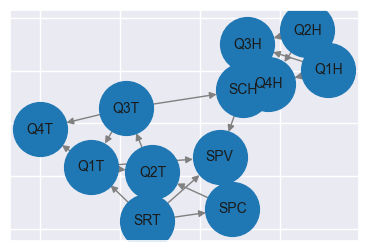

In [161]:
if dag_param_model is not None:
    bn_vars = sorted(list(dag_param_model.nodes()))
    print("bn_vars: ", bn_vars)
    dag_bn_skeleton_model.edges()

    filetag = "_".join([str(v) for v in kwargs.values()])
    filetag
    bays_util.plot_dag_graph_ntk(
                        bn_edges_df, ntk_structure_alg_tag=f"rcats_graph_bn_{filetag}", filepath=graph_html_filepath,
                        physics=True, label_edges=True, isnotation=True, nodefontsize=30,
                        height="650px", isshow=True, issave=True, **bays_util.graph_theme[graph_theme_sel]
                        )

In [ ]:
# bays_util.cd_bn_top_root_causes(dag_param_model)

In [163]:
bn_infer_kwargs = dict(
    st_target_vars_mbox = ["Q1T"],
    st_observed_vars_mbox = [],
    st_observe_vars_aml_mbox = [],
    st_observed_vars_wo_aml_mbox = [],
    st_target_vars_sbox = "",
    st_observed_vars_sbox = ""
)
objAnmCD.cd_bn_inference(dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1T"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2T"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1T"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2T", "Q3T", "Q4T"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'Q1T': {'Q3T', 'SRT__tlag_01', 'SCH', 'Q1T', 'Q3T__tlag_01', 'Q2T', 'SPC', 'Q4T'}}]
st_target_vars_mbox:  ['Q1T']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['Q1T'] with no {} computed through MinNeighbors heuristic:
['Q2T__tlag_05', 'SRT', 'SCH', 'Q1H__tlag_05', 'Q3T__tlag_01', 'SPC', 'Q4T', 'Q3T', 'SPC__tlag_03', 'Q2T', 'SRT__tlag_01', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'SPV', 'Q1T__tlag_05']
--- Ordering found in 0.0020 seconds ---

Probability of ['Q1T'] change with observed condition of {}:
--- Query executed in 0.0010 seconds ---

+--------+------------+
| Q1T    |   phi(Q1T) |
+========+============+
| Q1T(0) |     0.9487 |
+--------+------------+
| Q1T(1) |     0.0513 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves condition

In [164]:
bn_infer_kwargs = dict(
    st_target_vars_mbox = ["Q1H"],
    st_observed_vars_mbox = [],
    st_observe_vars_aml_mbox = [],
    st_observed_vars_wo_aml_mbox = [],
    st_target_vars_sbox = "",
    st_observed_vars_sbox = ""
)
objAnmCD.cd_bn_inference(dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1H"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2H"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1H"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2H", "Q3H", "Q4H"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'Q1H': {'Q2H', 'Q1H', 'Q4H', 'Q3H'}}]
st_target_vars_mbox:  ['Q1H']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['Q1H'] with no {} computed through MinNeighbors heuristic:
['Q2T__tlag_05', 'SRT', 'SCH', 'Q1H__tlag_05', 'Q3T__tlag_01', 'SPC', 'Q4T', 'Q3T', 'SPC__tlag_03', 'Q2T', 'Q1T', 'SRT__tlag_01', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'SPV', 'Q1T__tlag_05']
--- Ordering found in 0.0020 seconds ---

Probability of ['Q1H'] change with observed condition of {}:
--- Query executed in 0.0010 seconds ---

+--------+------------+
| Q1H    |   phi(Q1H) |
+========+============+
| Q1H(0) |     0.7383 |
+--------+------------+
| Q1H(1) |     0.2617 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given c

In [165]:
bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=[],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SPV"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SRT__tlag_01"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SPV", "SRT__tlag_01"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'SPC': {'SCH__tlag_05', 'Q3T', 'SRT__tlag_01', 'SCH', 'Q1T', 'SPV', 'SRT__tlag_05', 'Q1T__tlag_05', 'Q2T', 'SPC', 'Q4T'}}]
st_target_vars_mbox:  ['SPC']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['SPC'] with no {} computed through MinNeighbors heuristic:
['Q2T__tlag_05', 'SRT', 'SCH', 'Q1H__tlag_05', 'Q3T__tlag_01', 'Q4T', 'Q3T', 'SPC__tlag_03', 'Q2T', 'Q1T', 'SRT__tlag_01', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05', 'SPV']
--- Ordering found in 0.0020 seconds ---

Probability of ['SPC'] change with observed condition of {}:
--- Query executed in 0.0010 seconds ---

+--------+------------+
| SPC    |   phi(SPC) |
+========+============+
| SPC(0) |     0.9295 |
+--------+------------+
| SPC(1) |     0.0705 |
+--------+------------+
cd_con

In [166]:
bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPV"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=[],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPV"],
    st_observed_vars_mbox=[],
        st_observe_vars_aml_mbox=["SPC"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'SPV': {'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05', 'SPV', 'SPC'}}]
st_target_vars_mbox:  ['SPV']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['SPV'] with no {} computed through MinNeighbors heuristic:
['Q2T__tlag_05', 'SRT', 'SCH', 'Q1H__tlag_05', 'Q3T__tlag_01', 'SPC', 'Q4T', 'Q3T', 'SPC__tlag_03', 'Q2T', 'Q1T', 'SRT__tlag_01', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05']
--- Ordering found in 0.0030 seconds ---

Probability of ['SPV'] change with observed condition of {}:
--- Query executed in 0.0000 seconds ---

+--------+------------+
| SPV    |   phi(SPV) |
+========+============+
| SPV(0) |     0.9434 |
+--------+------------+
| SPV(1) |     0.0566 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probabili

#### PCMCI + ANAC + Edge Pruning + Sparse Data Handler + Sparse Link Handler

In [167]:
maxlag = 5
keep_len = 2*maxlag
ispreprocess_sparse = True
issparse_link = True
link_assume_thr = 0.01
kwargs = dict(session="cms_hcal_rm",
                  cd_sel="cd_ts",
                  dag_skeleton_alg="pcmci",
                  ci_test='ParCorr',
                  influence_dxn="positive", # ANAC
                  significance_level=0.05,
                  maxlag=maxlag,
                  tau_min=0,
                  keep_len=keep_len,
                  ispreprocess_sparse=ispreprocess_sparse,
                  isflag_sparse_handle=True,
                  isremove_self_lags=True,
                  issparse_link=issparse_link,
                  link_assume_thr=link_assume_thr,
                  session_tag="",
            )

df_aml_rca_compressed, dag_skeleton_model, edges_df, net_df, proc_t = objAnmCD.cd_gcm_build(df_aml_rca.copy(),
                                                                                approach="fullts",
                                                                                verbosity=0,
                                                                                **kwargs
                                                                                )

################################################################################
nonconstant_sensors:  Index(['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T'], dtype='object')
sparse_data_handler...data_mode: nan:  {'method': None, 'fill_value': 0.0, 'isdrop_all_mode': False, 'keep_len': 10, 'isdropna': True, 'issparse_gap_opt': True, 'isfillna': True, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
nan_handler... {'keep_len': 10, 'min_gap_len': 5, 'nan_gap_keep_len': 5}
dropping nan before:  (381944, 12)
num of nan records:  0
sparse_time_gap_handler...
(381944, 12)
nan_gap_keep_len: 5, min_gap_len: 5
['SCH', 'SPC', 'SPV', 'SRT', 'Q1H', 'Q1T', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q4H', 'Q4T']
Number of gaps:  0
(381944, 12)
dropping nan after:  (381944, 12)
num of nan records:  0
   SCH  SPC  SPV  SRT  Q1H  Q1T  Q2H  Q2T  Q3H  Q3T  Q4H  Q4T
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 

'cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_True_0.01_'

plot_dag_graph_ntk...
  source target    weight    t
0    Q1H    Q2H  0.288203  [0]
1    Q1H    Q3H  0.375978  [0]
2    Q1H    Q4H  0.338522  [0]
3    Q1T    Q2T  0.408305  [0]
4    Q1T    Q4T  0.302953  [0]
c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/rcats_graph_cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_True_0.01_.html


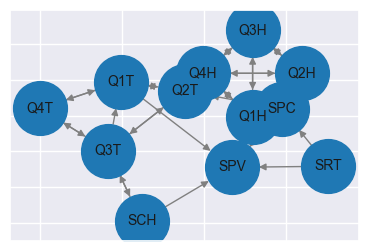

In [168]:
graph_html_filepath = rf"{fig_dirpath}/{datafilename}"
filetag = "_".join([str(v) for v in kwargs.values()])
filetag
graph_theme_sel = "white"
bays_util.plot_dag_graph_ntk(
                            bays_util.aggregate_time_tag_edges(edges_df)[['src', 'dst', 'weight', 't']], ntk_structure_alg_tag=f"rcats_graph_{filetag}", filepath=graph_html_filepath,
                            physics=True, label_edges=True, isnotation=True, nodefontsize=30,
                            height="650px", isshow=True, issave=True, **bays_util.graph_theme[graph_theme_sel]
                            )

In [169]:
# bays_util.aggregate_time_tag_edges(edges_df)[['src', 'dst', 'weight', 't']]

##### Using Domain Edges for Orienting Bidirected Links at $t=0$

In [170]:
prune_opt = {"isweight_first":False,
            "weight_aware":True,
            "use_weighted_tlag":True, 
            "verbose": True
            }
keep_undirected_at_lagged_zero = False # uses domain_edges at t==0
domain_edges_to_direct = domain_edges
dag_param_model, dag_bn_skeleton_model, bn_edges_df = objAnmCD.cd_bn_model_build(df_aml_rca_compressed.fillna(0), 
                                                                                edges_df, 
                                                                                dag_params_alg='bayesian', 
                                                                                keep_undirected_at_lagged_zero=keep_undirected_at_lagged_zero, 
                                                                                equivalent_sample_size=10,
                                                                                domain_edges=domain_edges_to_direct, **prune_opt)

cd_bn_analysis... {'keep_undirected_at_lagged_zero': False, 'equivalent_sample_size': 10, 'domain_edges': [('SPV', 'SPC'), ('SRT', 'SPC'), ('SRT', 'SPV'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('Q3H', 'Q4H'), ('Q1T', 'Q2T'), ('Q1T', 'Q3T'), ('Q1T', 'Q4T'), ('Q2T', 'Q3T'), ('Q2T', 'Q4T'), ('Q3T', 'Q4T'), ('Q1T', 'SPV'), ('Q1T', 'SPC'), ('Q2T', 'SPV'), ('Q2T', 'SPC'), ('Q3T', 'SPV'), ('Q3T', 'SPC'), ('Q4T', 'SPV'), ('Q4T', 'SPC')], 'isweight_first': False, 'weight_aware': True, 'use_weighted_tlag': True, 'verbose': True}


7it [00:00, 1168.05it/s]

################################################################################
prune_binary_ts_edges..., keep_undirected_at_lagged_zero: False, weight_aware: True, use_weighted_tlag:True
Agg edge df:
    src  dst  t    weight
0   Q1H  Q2H  0  0.288203
1   Q1H  Q3H  0  0.375978
2   Q1H  Q4H  0  0.338522
3   Q1T  Q2T  0  0.408305
4   Q1T  Q4T  0  0.302953
5   Q1T  SPV -5  0.093483
6   Q2H  Q1H  0  0.288203
7   Q2H  Q3H  0  0.265589
8   Q2H  Q4H  0  0.255115
9   Q2T  Q1T  0  0.408305
10  Q2T  Q3T  0  0.631012
11  Q3H  Q1H  0  0.375978
12  Q3H  Q2H  0  0.265589
13  Q3H  Q4H  0  0.377627
14  Q3T  Q1T -1  0.103840
15  Q3T  Q2T  0  0.631012
16  Q3T  Q4T  0  0.625850
17  Q3T  SCH  0  0.101248
18  Q4H  Q1H  0  0.338522
19  Q4H  Q2H  0  0.255115
20  Q4H  Q3H  0  0.377627
21  Q4T  Q1T  0  0.302953
22  Q4T  Q3T  0  0.625850
23  SCH  Q3T  0  0.101248
24  SCH  SPV -5  0.072080
25  SPC  Q2T -3  0.122741
26  SPC  SPV  0  0.413023
27  SPV  SPC  0  0.413023
28  SRT  SPC -1  0.091725
29  SRT  SPV -5  0

active_nodes:  ['SPC__tlag_03', 'Q1H', 'SCH__tlag_05', 'Q3T', 'SPC', 'Q3H', 'SCH', 'SRT__tlag_01', 'Q1T', 'SPV', 'Q2H', 'SRT__tlag_05', 'Q3T__tlag_01', 'Q1T__tlag_05', 'Q2T', 'Q4H', 'Q4T']
number of active_nodes: 17
data size:  (911, 17)
dag bn parameter estimation...
process time: 0.05145883560180664 seconds.


bn_vars:  ['Q1H', 'Q1T', 'Q1T__tlag_05', 'Q2H', 'Q2T', 'Q3H', 'Q3T', 'Q3T__tlag_01', 'Q4H', 'Q4T', 'SCH', 'SCH__tlag_05', 'SPC', 'SPC__tlag_03', 'SPV', 'SRT__tlag_01', 'SRT__tlag_05']


OutEdgeView([('SPC__tlag_03', 'Q2T'), ('Q1H', 'Q2H'), ('Q1H', 'Q3H'), ('Q1H', 'Q4H'), ('SCH__tlag_05', 'SPV'), ('Q3T', 'Q4T'), ('Q3T', 'SCH'), ('Q3H', 'Q4H'), ('SRT__tlag_01', 'SPC'), ('Q1T', 'Q2T'), ('Q1T', 'Q4T'), ('SPV', 'SPC'), ('Q2H', 'Q3H'), ('Q2H', 'Q4H'), ('SRT__tlag_05', 'SPV'), ('Q3T__tlag_01', 'Q1T'), ('Q1T__tlag_05', 'SPV'), ('Q2T', 'Q3T')])

'cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_True_0.01_'

plot_dag_graph_ntk...
  source target    weight  t
0    Q1H    Q2H  0.288203  0
1    Q1H    Q3H  0.375978  0
2    Q1H    Q4H  0.338522  0
3    Q1T    Q2T  0.408305  0
4    Q1T    Q4T  0.302953  0
c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\AnomalyCD/results//CMS_HCAL/causal_data/rcats_graph_bn_cms_hcal_rm_cd_ts_pcmci_ParCorr_positive_0.05_5_0_10_True_True_True_True_0.01_.html


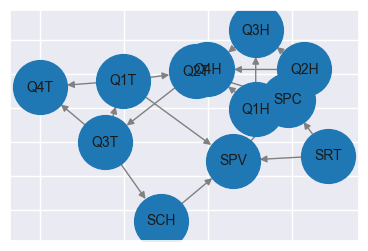

In [171]:
if dag_param_model is not None:
    bn_vars = sorted(list(dag_param_model.nodes()))
    print("bn_vars: ", bn_vars)
    dag_bn_skeleton_model.edges()

    filetag = "_".join([str(v) for v in kwargs.values()])
    filetag
    bays_util.plot_dag_graph_ntk(
                        bn_edges_df, ntk_structure_alg_tag=f"rcats_graph_bn_{filetag}", filepath=graph_html_filepath,
                        physics=True, label_edges=True, isnotation=True, nodefontsize=30,
                        height="650px", isshow=True, issave=True, **bays_util.graph_theme[graph_theme_sel]
                        )

In [ ]:
# bays_util.cd_bn_top_root_causes(dag_param_model)

In [172]:
bn_infer_kwargs = dict(
    st_target_vars_mbox = ["Q1T"],
    st_observed_vars_mbox = [],
    st_observe_vars_aml_mbox = [],
    st_observed_vars_wo_aml_mbox = [],
    st_target_vars_sbox = "",
    st_observed_vars_sbox = ""
)
objAnmCD.cd_bn_inference(dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1T"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2T"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1T"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2T", "Q3T", "Q4T"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'Q1T': {'Q3T__tlag_01', 'Q2T', 'Q3T', 'Q1T', 'SCH', 'Q4T'}}]
st_target_vars_mbox:  ['Q1T']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['Q1T'] with no {} computed through MinNeighbors heuristic:
['SCH', 'Q3T__tlag_01', 'SPC', 'SRT__tlag_01', 'Q4T', 'Q3T', 'SPC__tlag_03', 'Q2T', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'SPV', 'Q1T__tlag_05']
--- Ordering found in 0.0010 seconds ---

Probability of ['Q1T'] change with observed condition of {}:
--- Query executed in 0.0000 seconds ---

+--------+------------+
| Q1T    |   phi(Q1T) |
+========+============+
| Q1T(0) |     0.9479 |
+--------+------------+
| Q1T(1) |     0.0521 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active

In [173]:
bn_infer_kwargs = dict(
    st_target_vars_mbox = ["Q1H"],
    st_observed_vars_mbox = [],
    st_observe_vars_aml_mbox = [],
    st_observed_vars_wo_aml_mbox = [],
    st_target_vars_sbox = "",
    st_observed_vars_sbox = ""
)
objAnmCD.cd_bn_inference(dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1H"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2H"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["Q1H"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["Q2H", "Q3H", "Q4H"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox = "",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'Q1H': {'Q2H', 'Q1H', 'Q4H', 'Q3H'}}]
st_target_vars_mbox:  ['Q1H']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['Q1H'] with no {} computed through MinNeighbors heuristic:
['SCH', 'Q3T__tlag_01', 'SPC', 'SRT__tlag_01', 'Q4T', 'Q3T', 'Q1T', 'SPC__tlag_03', 'Q2T', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'SPV', 'Q1T__tlag_05']
--- Ordering found in 0.0015 seconds ---

Probability of ['Q1H'] change with observed condition of {}:
--- Query executed in 0.0000 seconds ---

+--------+------------+
| Q1H    |   phi(Q1H) |
+========+============+
| Q1H(0) |     0.7383 |
+--------+------------+
| Q1H(1) |     0.2617 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'Q1H':

In [174]:
bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=[],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SPV"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SRT__tlag_01"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPC"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=["SPV", "SRT__tlag_01"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'SPC': {'SRT__tlag_05', 'SCH__tlag_05', 'SPC', 'SRT__tlag_01', 'SPV', 'Q1T__tlag_05'}}]
st_target_vars_mbox:  ['SPC']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['SPC'] with no {} computed through MinNeighbors heuristic:
['SCH', 'Q3T__tlag_01', 'Q4T', 'Q3T', 'Q1T', 'SPC__tlag_03', 'Q2T', 'SRT__tlag_01', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05', 'SPV']
--- Ordering found in 0.0020 seconds ---

Probability of ['SPC'] change with observed condition of {}:
--- Query executed in 0.0010 seconds ---

+--------+------------+
| SPC    |   phi(SPC) |
+========+============+
| SPC(0) |     0.9295 |
+--------+------------+
| SPC(1) |     0.0705 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on 

In [175]:
bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPV"],
    st_observed_vars_mbox=[],
    st_observe_vars_aml_mbox=[],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

bn_infer_kwargs = dict(
    st_target_vars_mbox=["SPV"],
    st_observed_vars_mbox=[],
        st_observe_vars_aml_mbox=["SPC"],
    st_observed_vars_wo_aml_mbox=[],
    st_target_vars_sbox="",
    st_observed_vars_sbox=""
)
objAnmCD.cd_bn_inference(
    dag_param_model, cd_opt="Probabilistic Inference Report", **bn_infer_kwargs)

cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condition.
active_trail_nodes: 
[{'SPV': {'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05', 'SPV', 'SPC'}}]
st_target_vars_mbox:  ['SPV']
st_observe_vars_aml_mbox:  []
st_observed_vars_wo_aml_mbox:  []
observe_vars_dict: {}
cond_prob_inference_report...
Elimination order for ['SPV'] with no {} computed through MinNeighbors heuristic:
['SCH', 'Q3T__tlag_01', 'SPC', 'SRT__tlag_01', 'Q4T', 'Q3T', 'Q1T', 'SPC__tlag_03', 'Q2T', 'Q1H', 'Q3H', 'Q2H', 'Q4H', 'SRT__tlag_05', 'SCH__tlag_05', 'Q1T__tlag_05']
--- Ordering found in 0.0020 seconds ---

Probability of ['SPV'] change with observed condition of {}:
--- Query executed in 0.0010 seconds ---

+--------+------------+
| SPV    |   phi(SPV) |
+========+============+
| SPV(0) |     0.9434 |
+--------+------------+
| SPV(1) |     0.0566 |
+--------+------------+
cd_cond_prob_infer_report
Retrieves conditional probability of anomaly flags on the given condit